<a href="https://colab.research.google.com/github/kajastalder/data-science-fundamentals/blob/main/Coding_task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Manual count : 50-54


<ipython-input-3-6774eb0fd5fa>:51: FutureWarning: `selem` is a deprecated argument name for `median`. It will be removed in version 1.0. Please use `footprint` instead.
  image_mean = skf.median(cropped_image,selem=skm.disk(25))


Automatic count:  39 



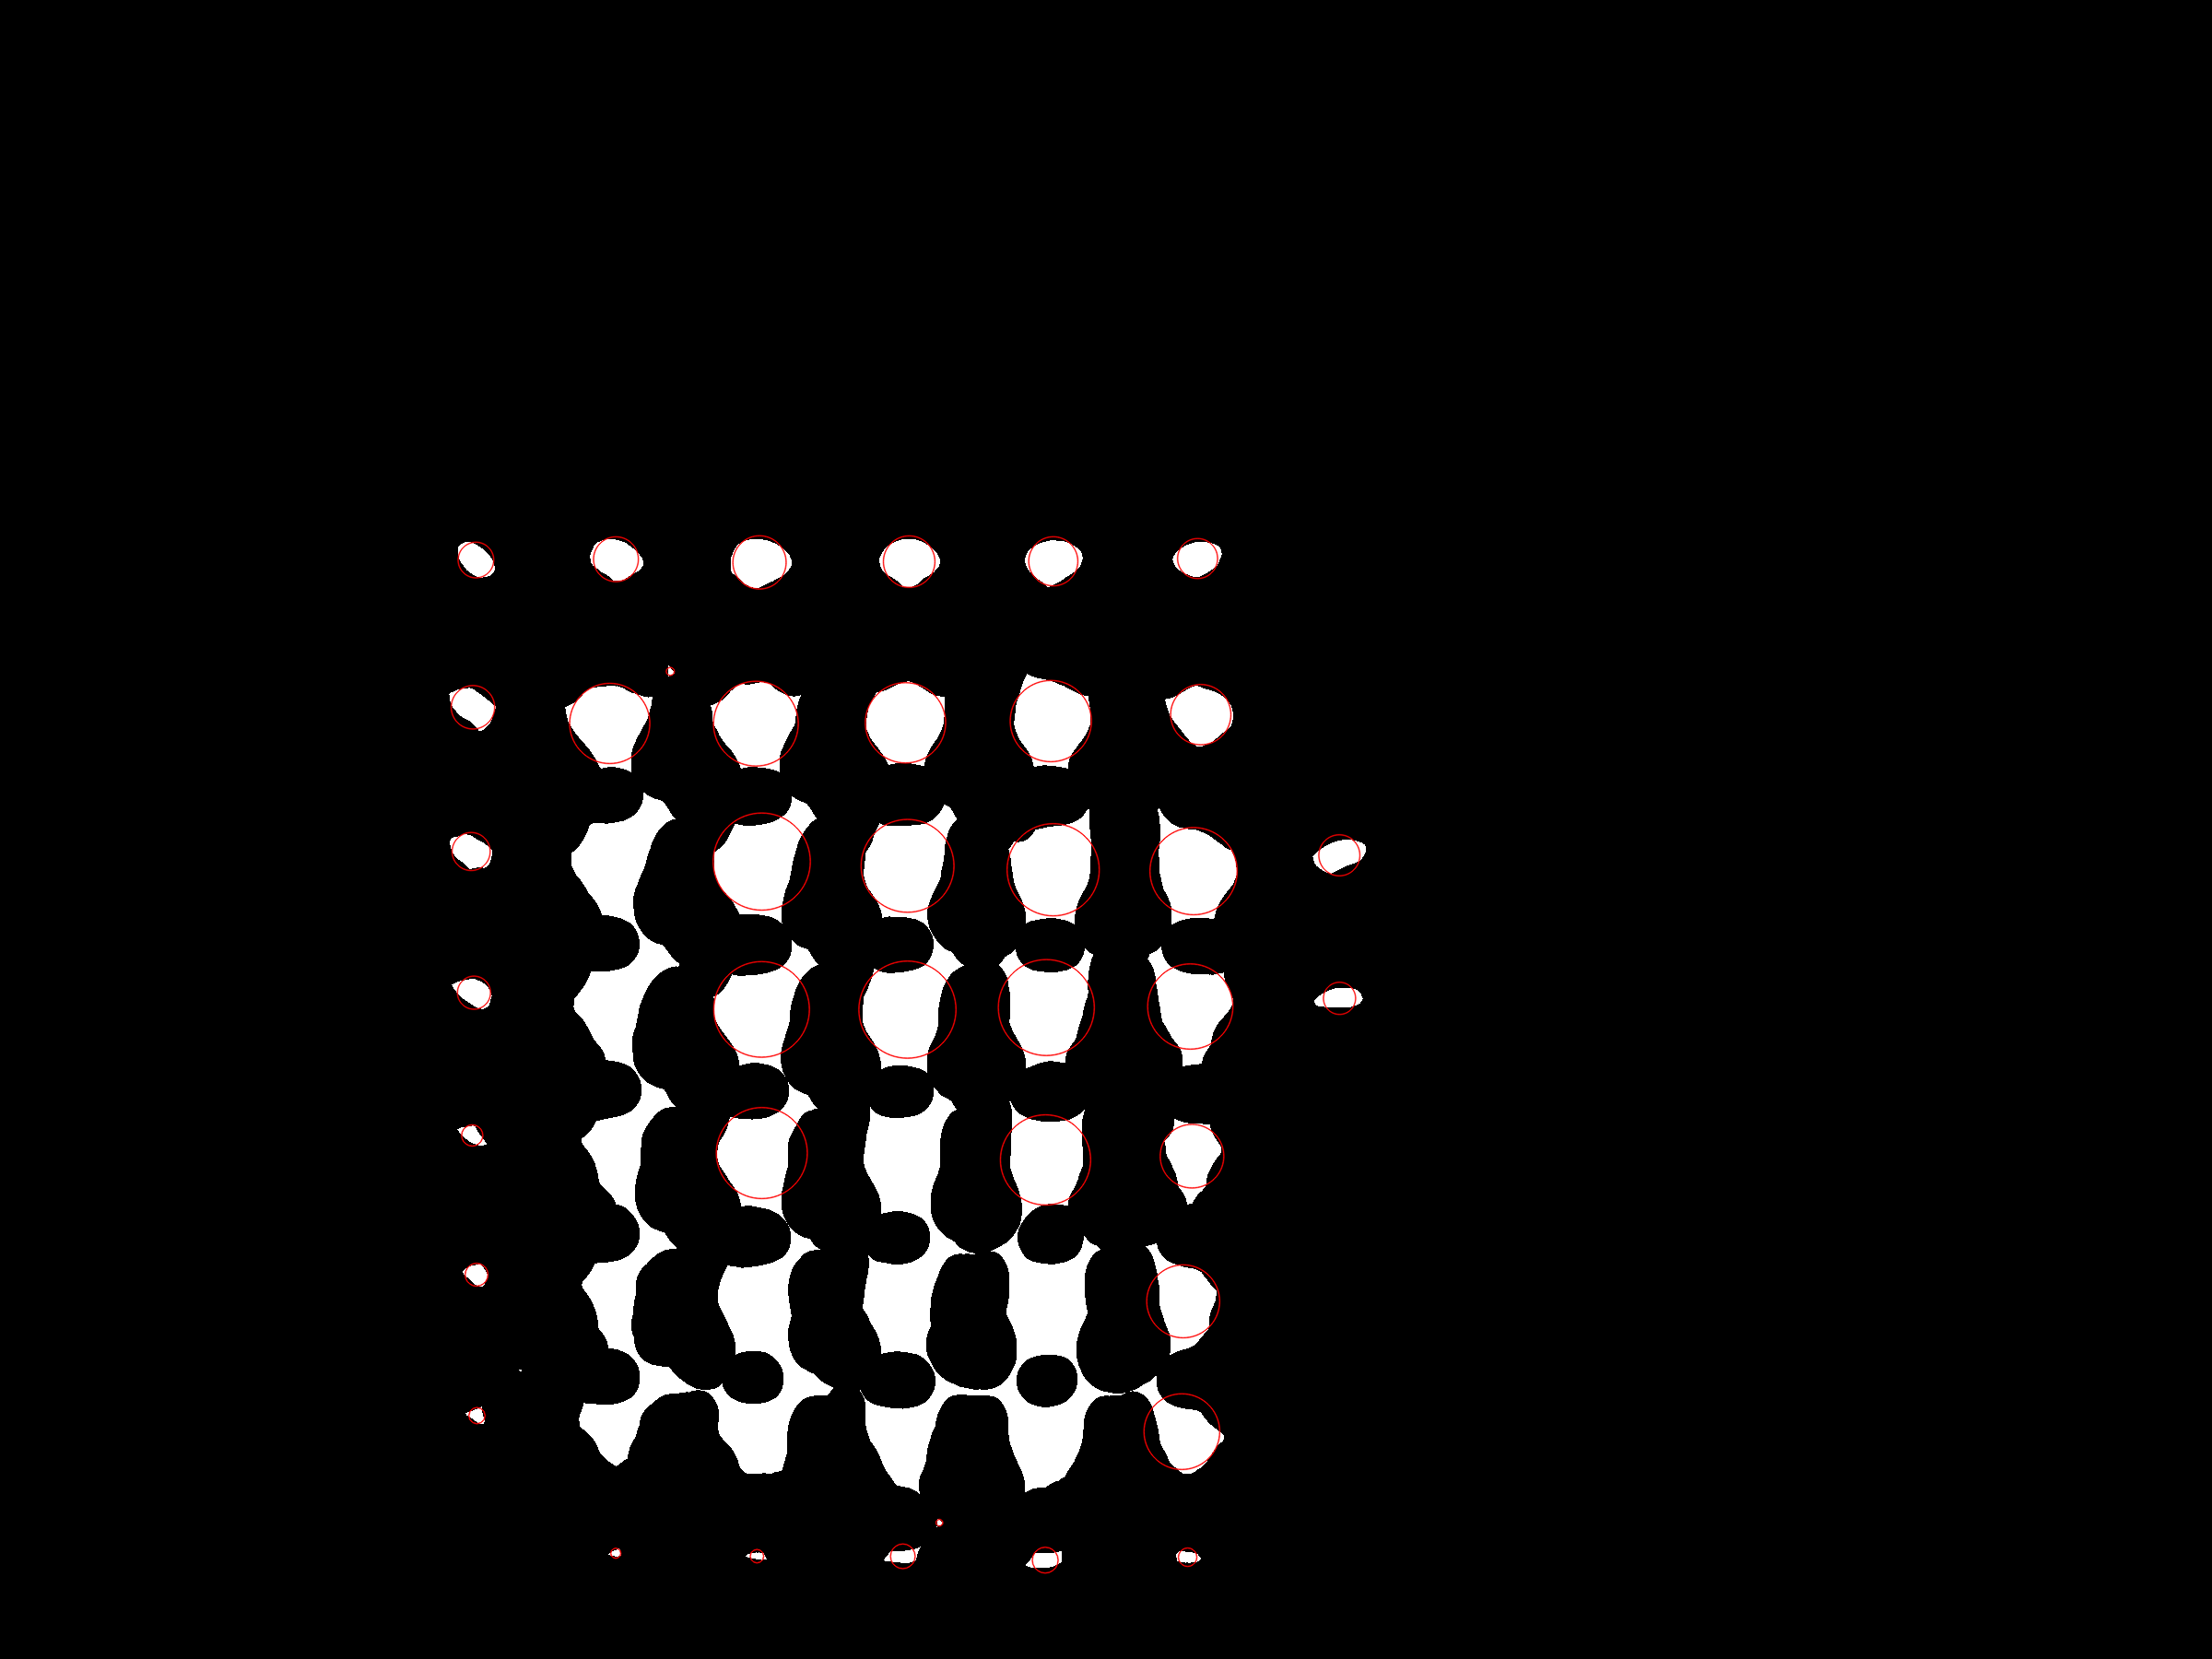

Image Number: 5379
Manual count: 50-54
Automatic count:  39 



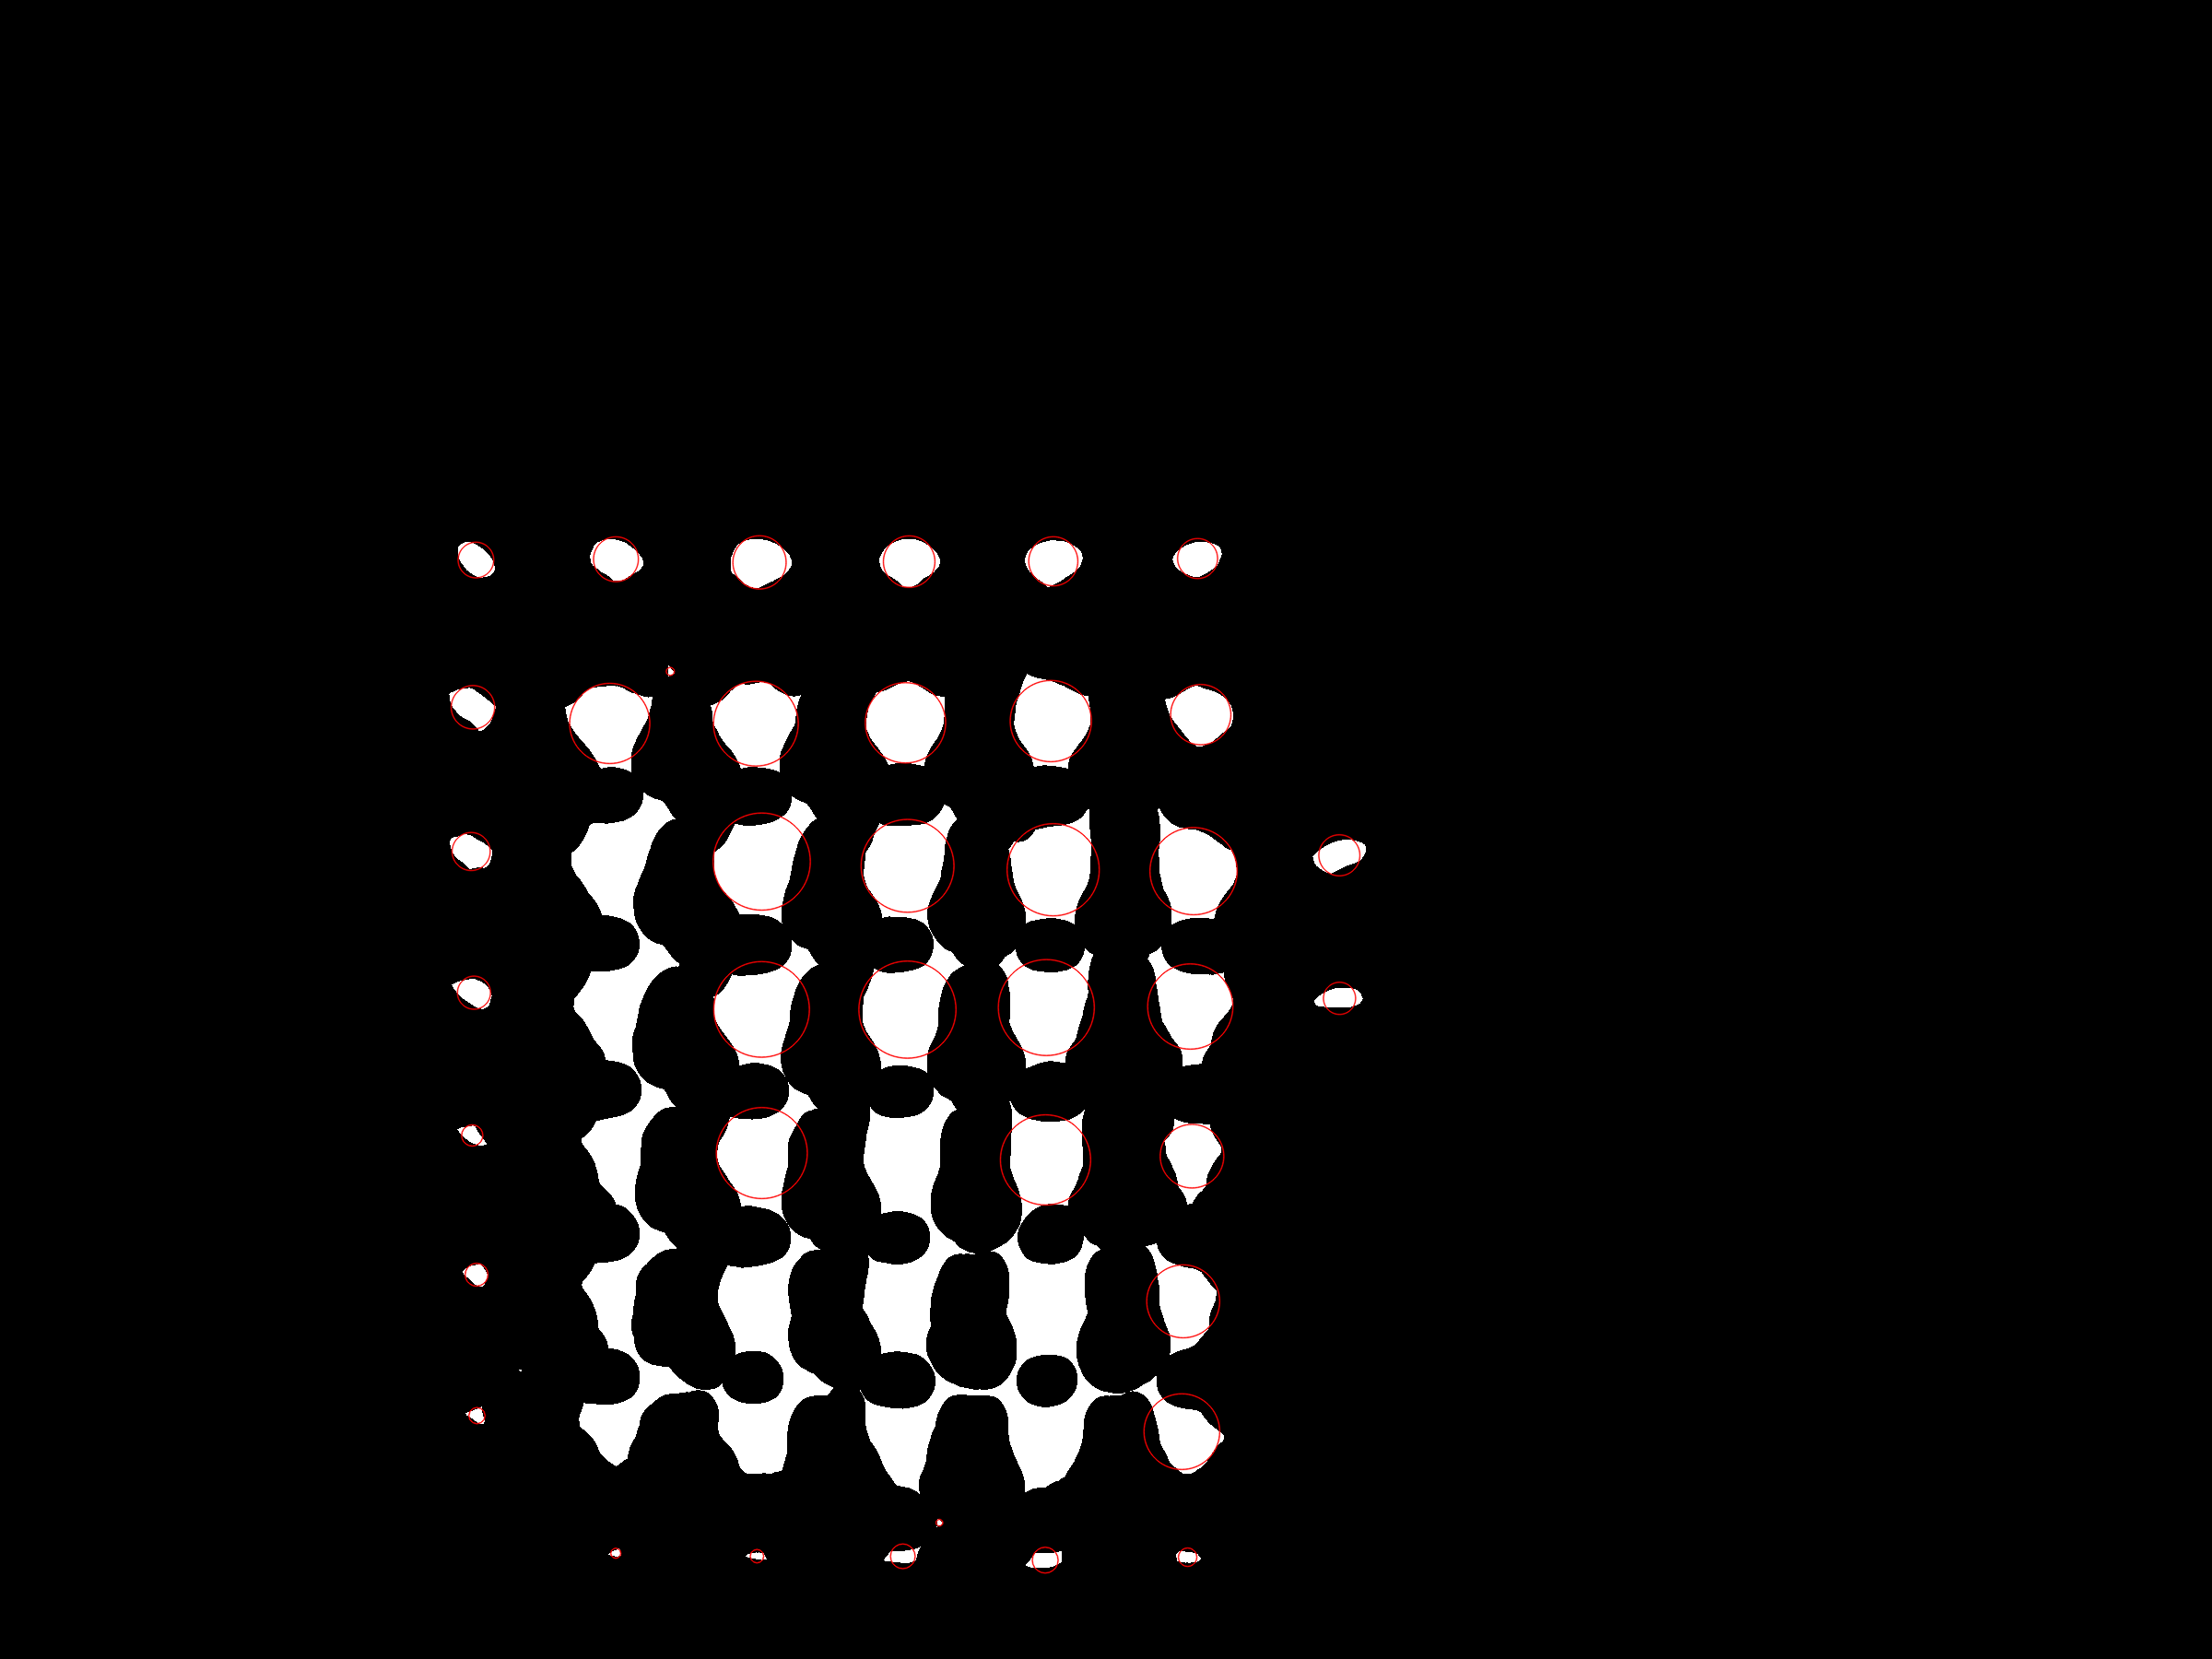

Image Number: 5380
Manual count: 46-48
Automatic count:  39 



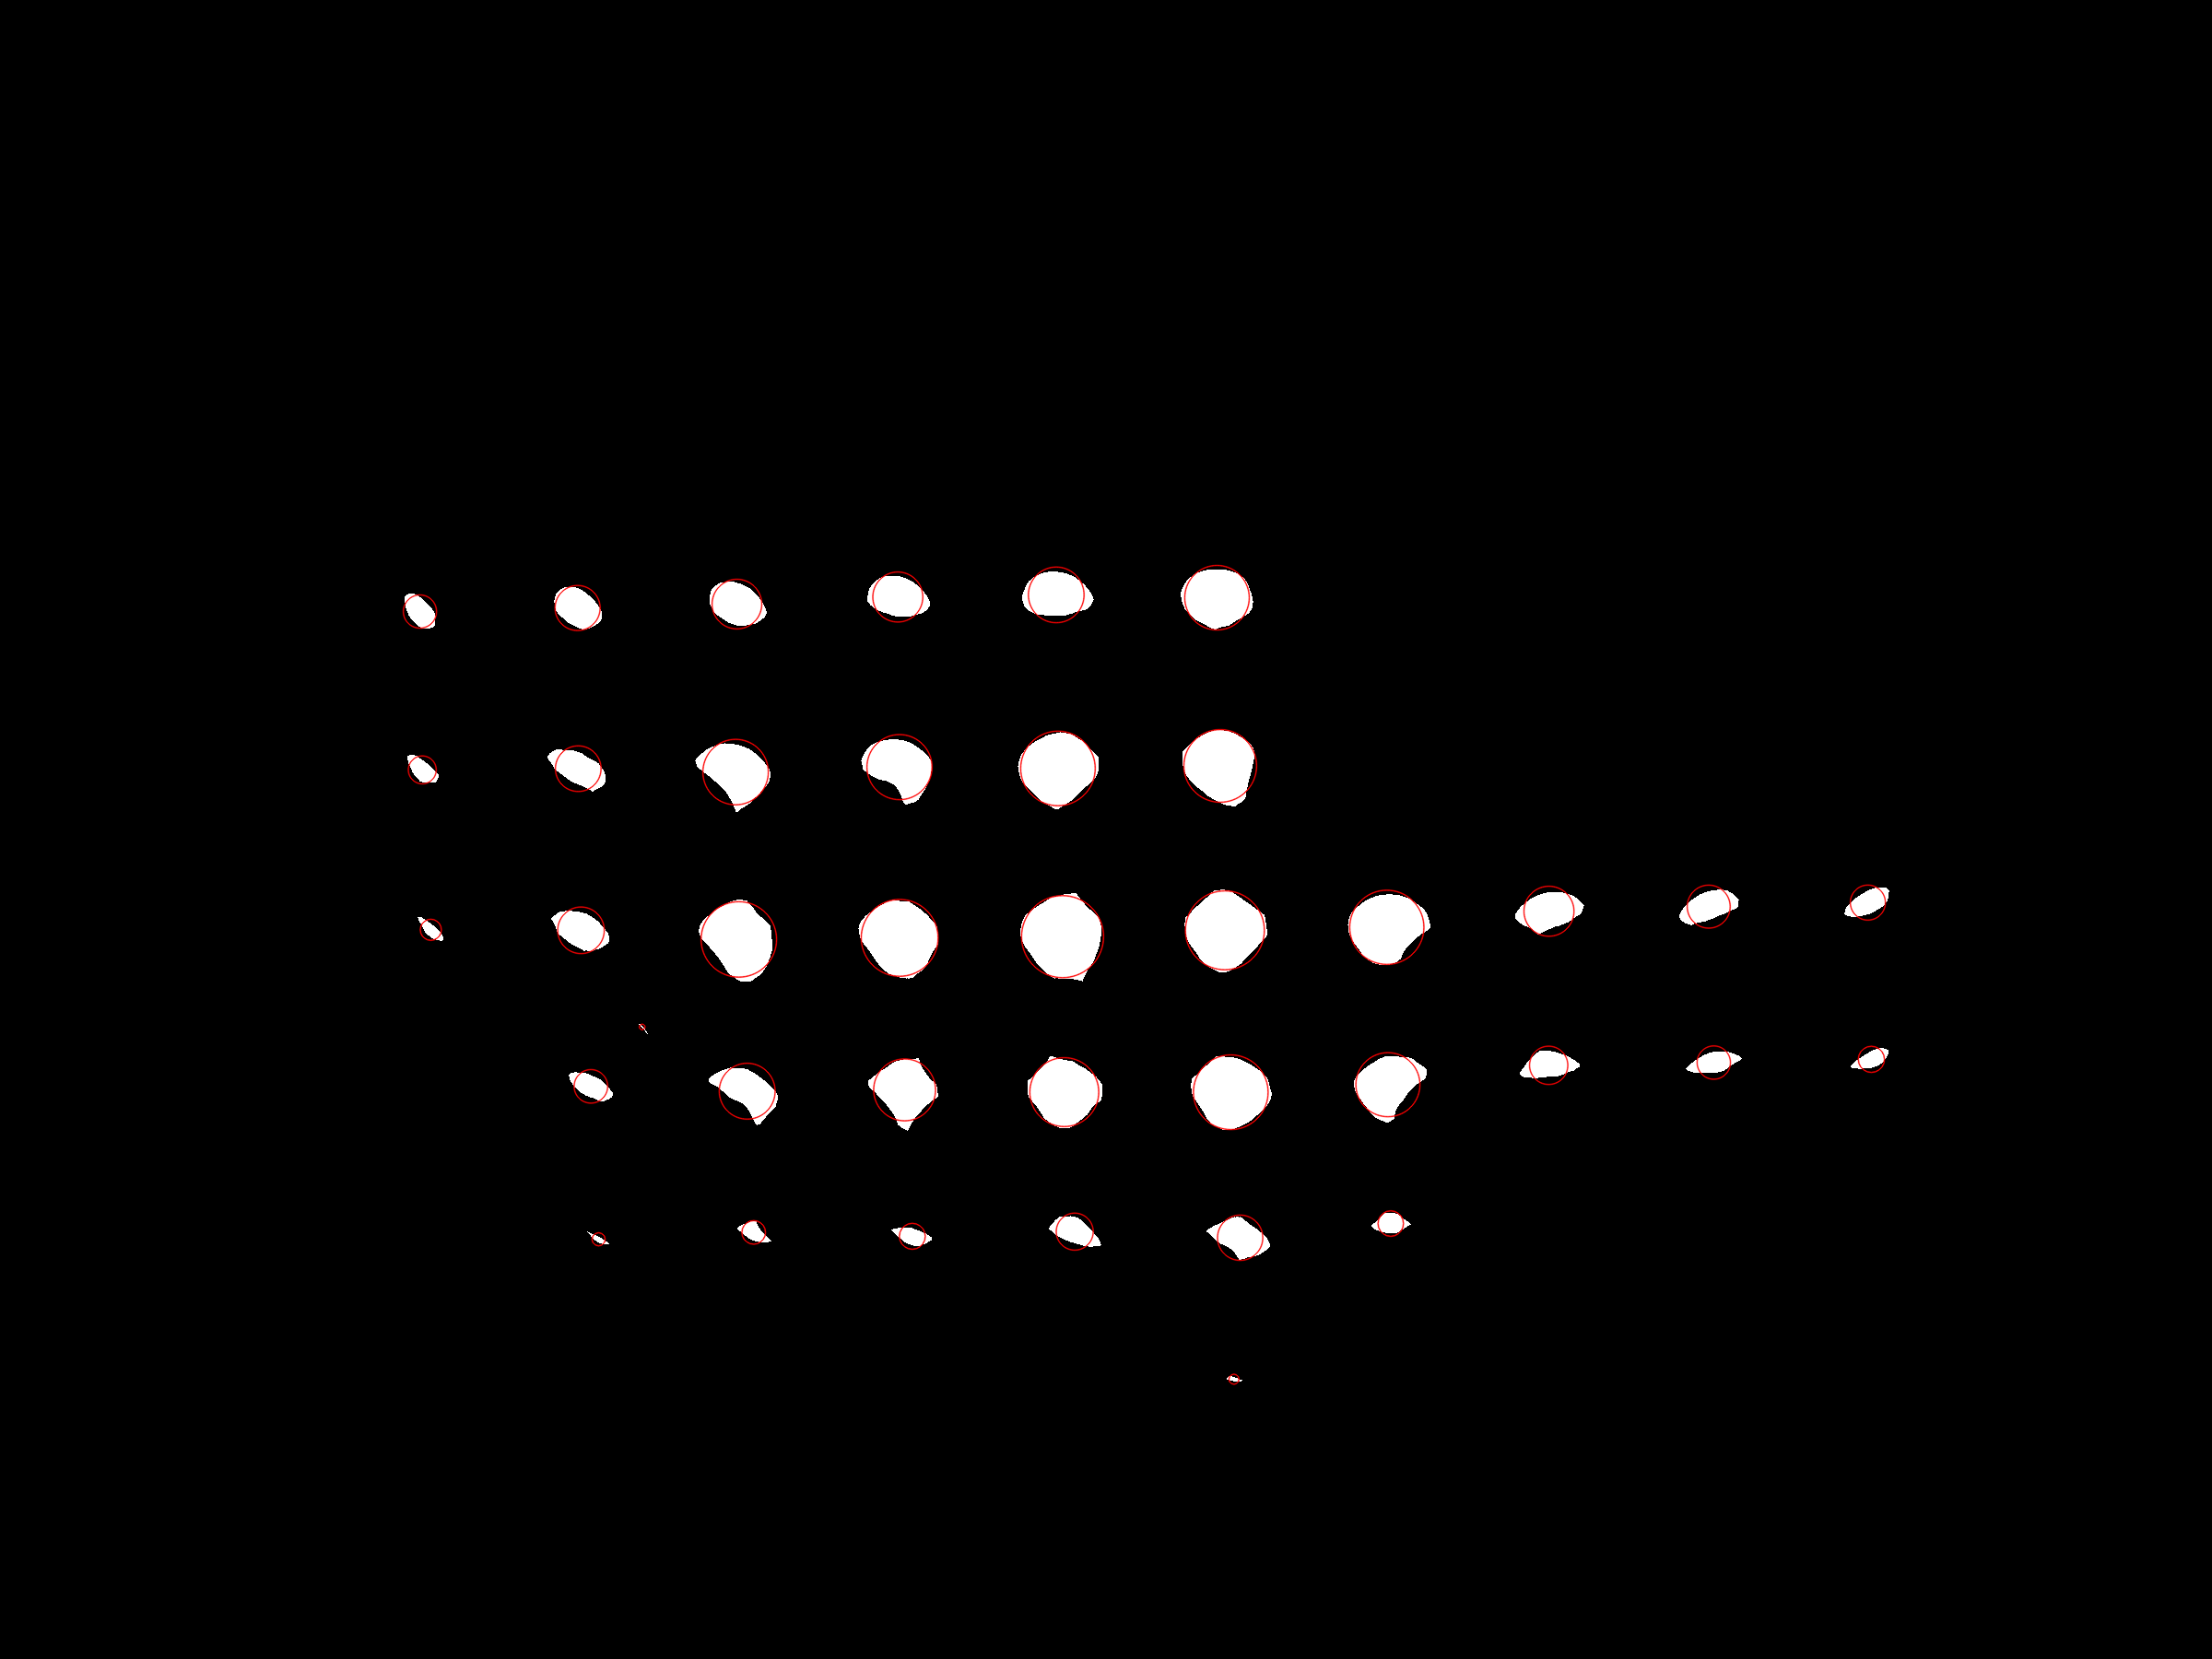

Image Number: 5381
Manual count: 61-63
Automatic count:  50 



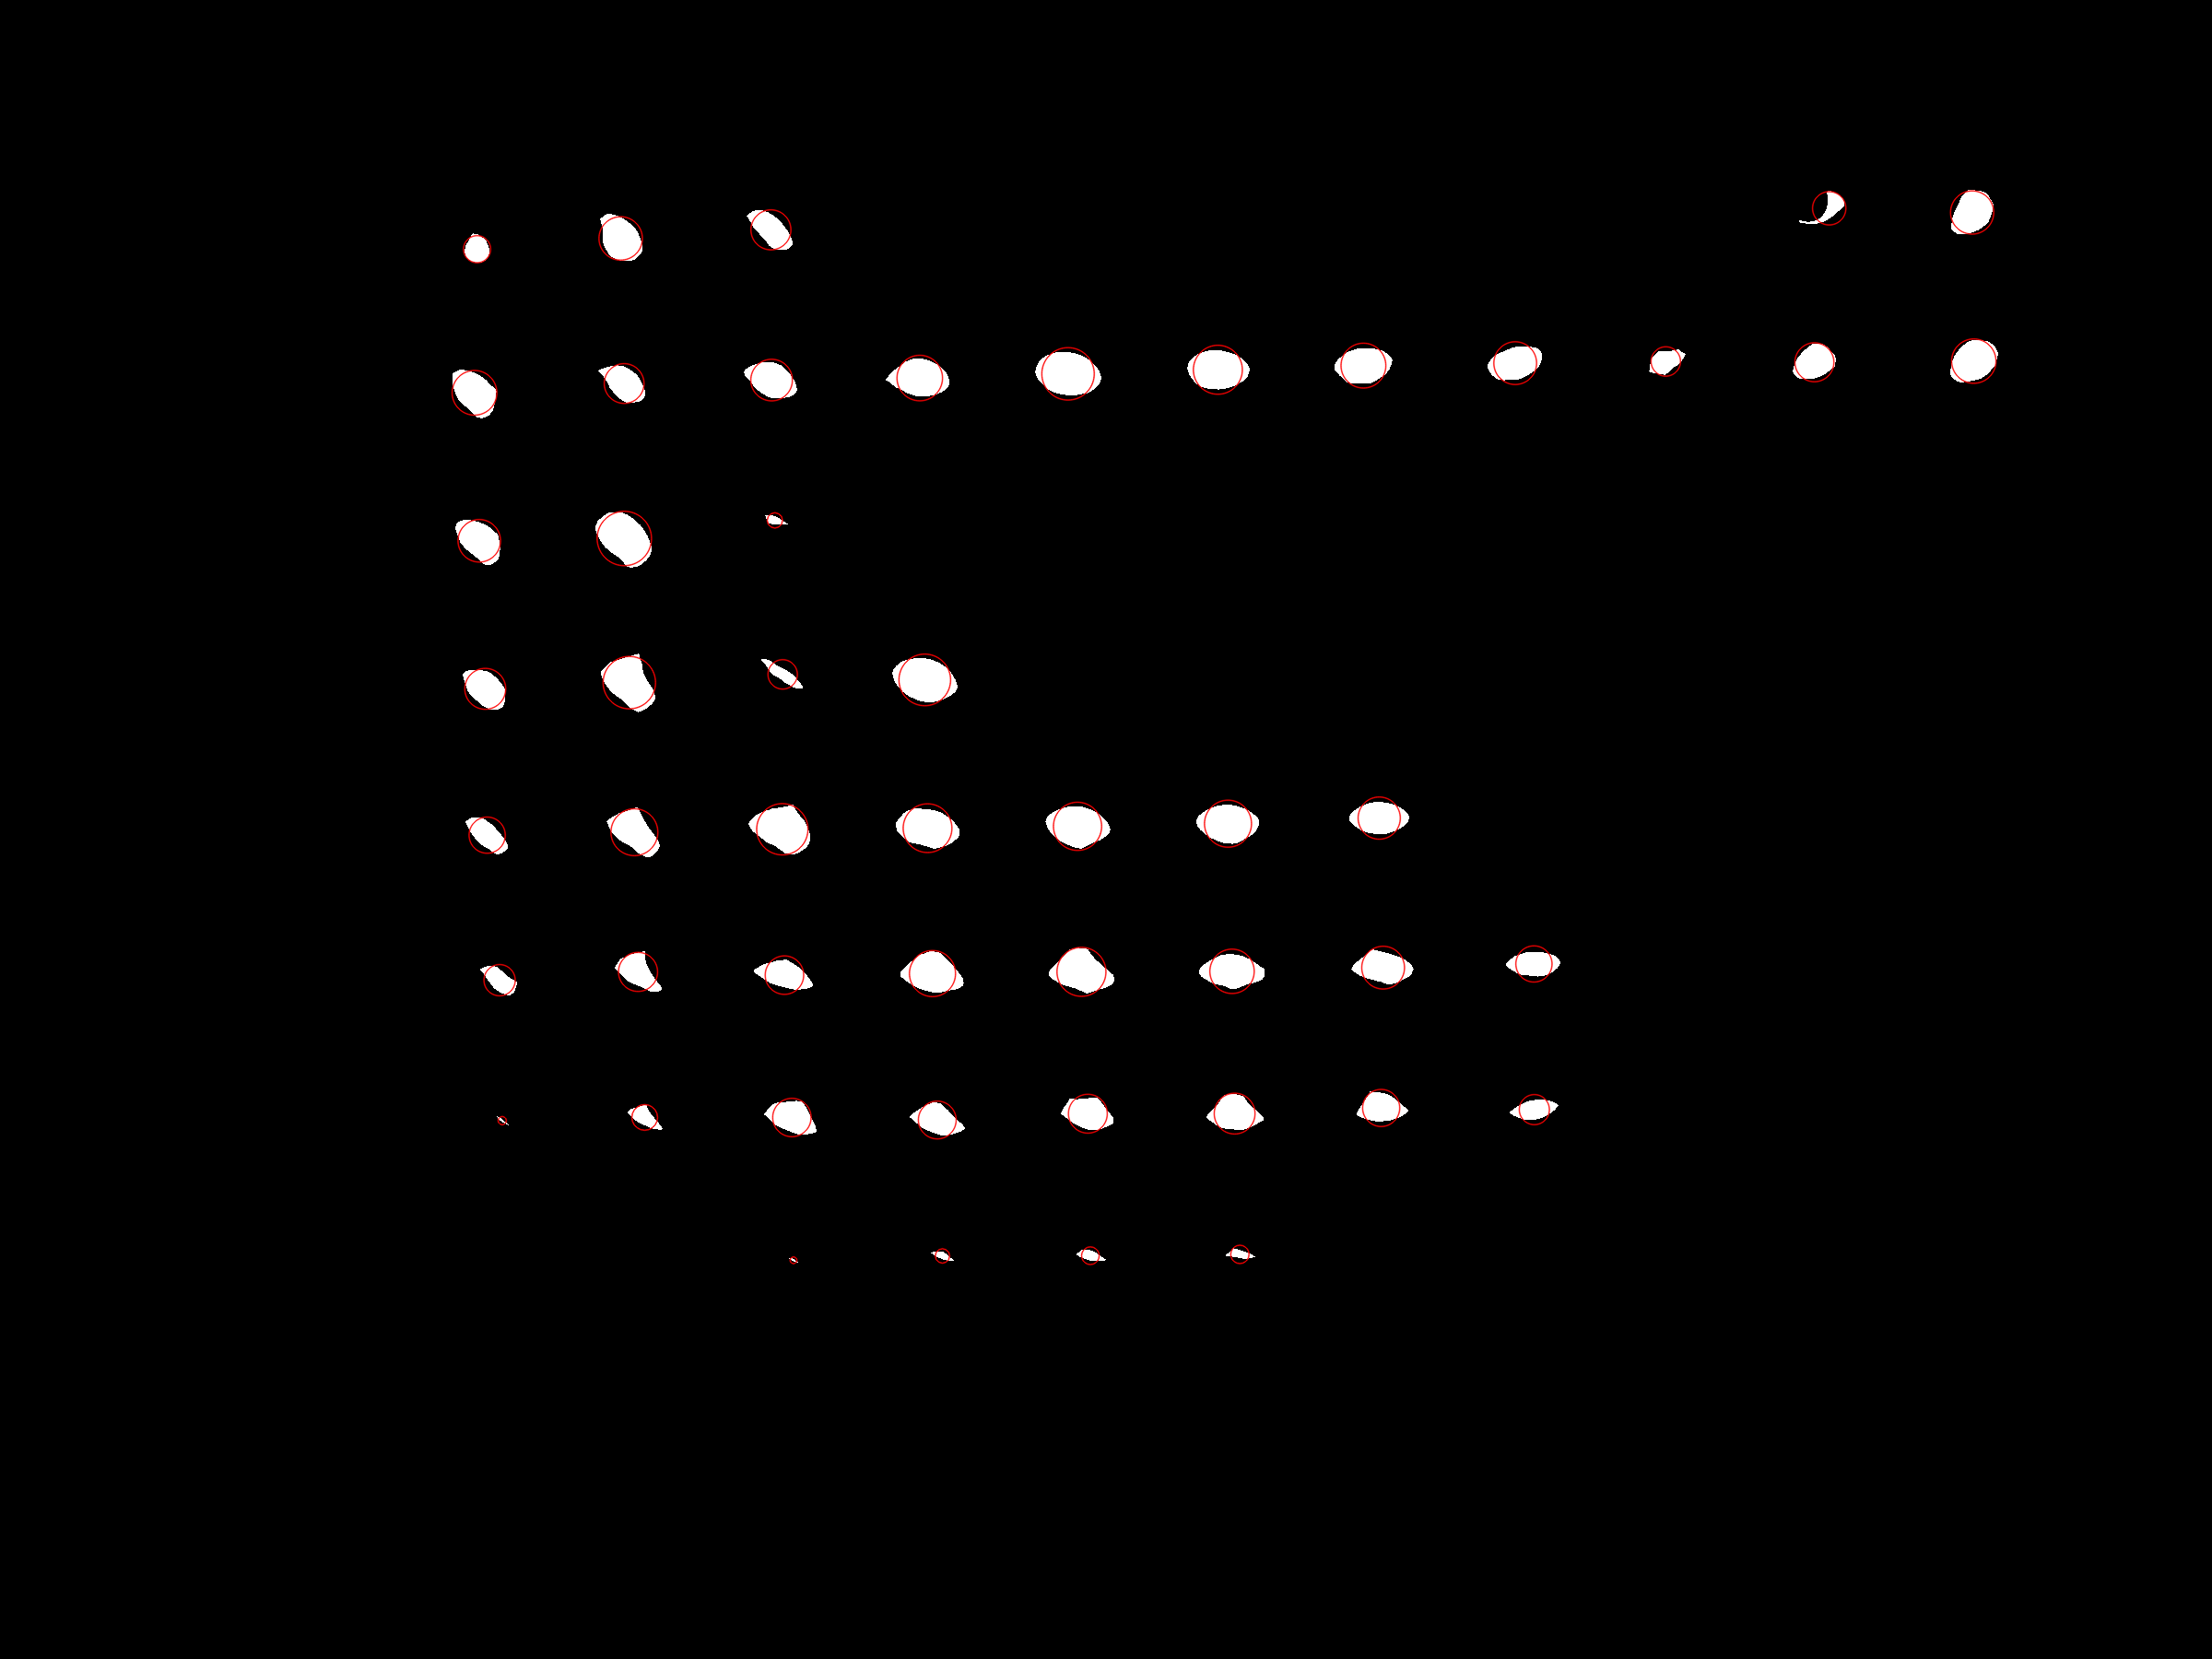

Image Number: 5382
Manual count: 42-47
Automatic count:  44 



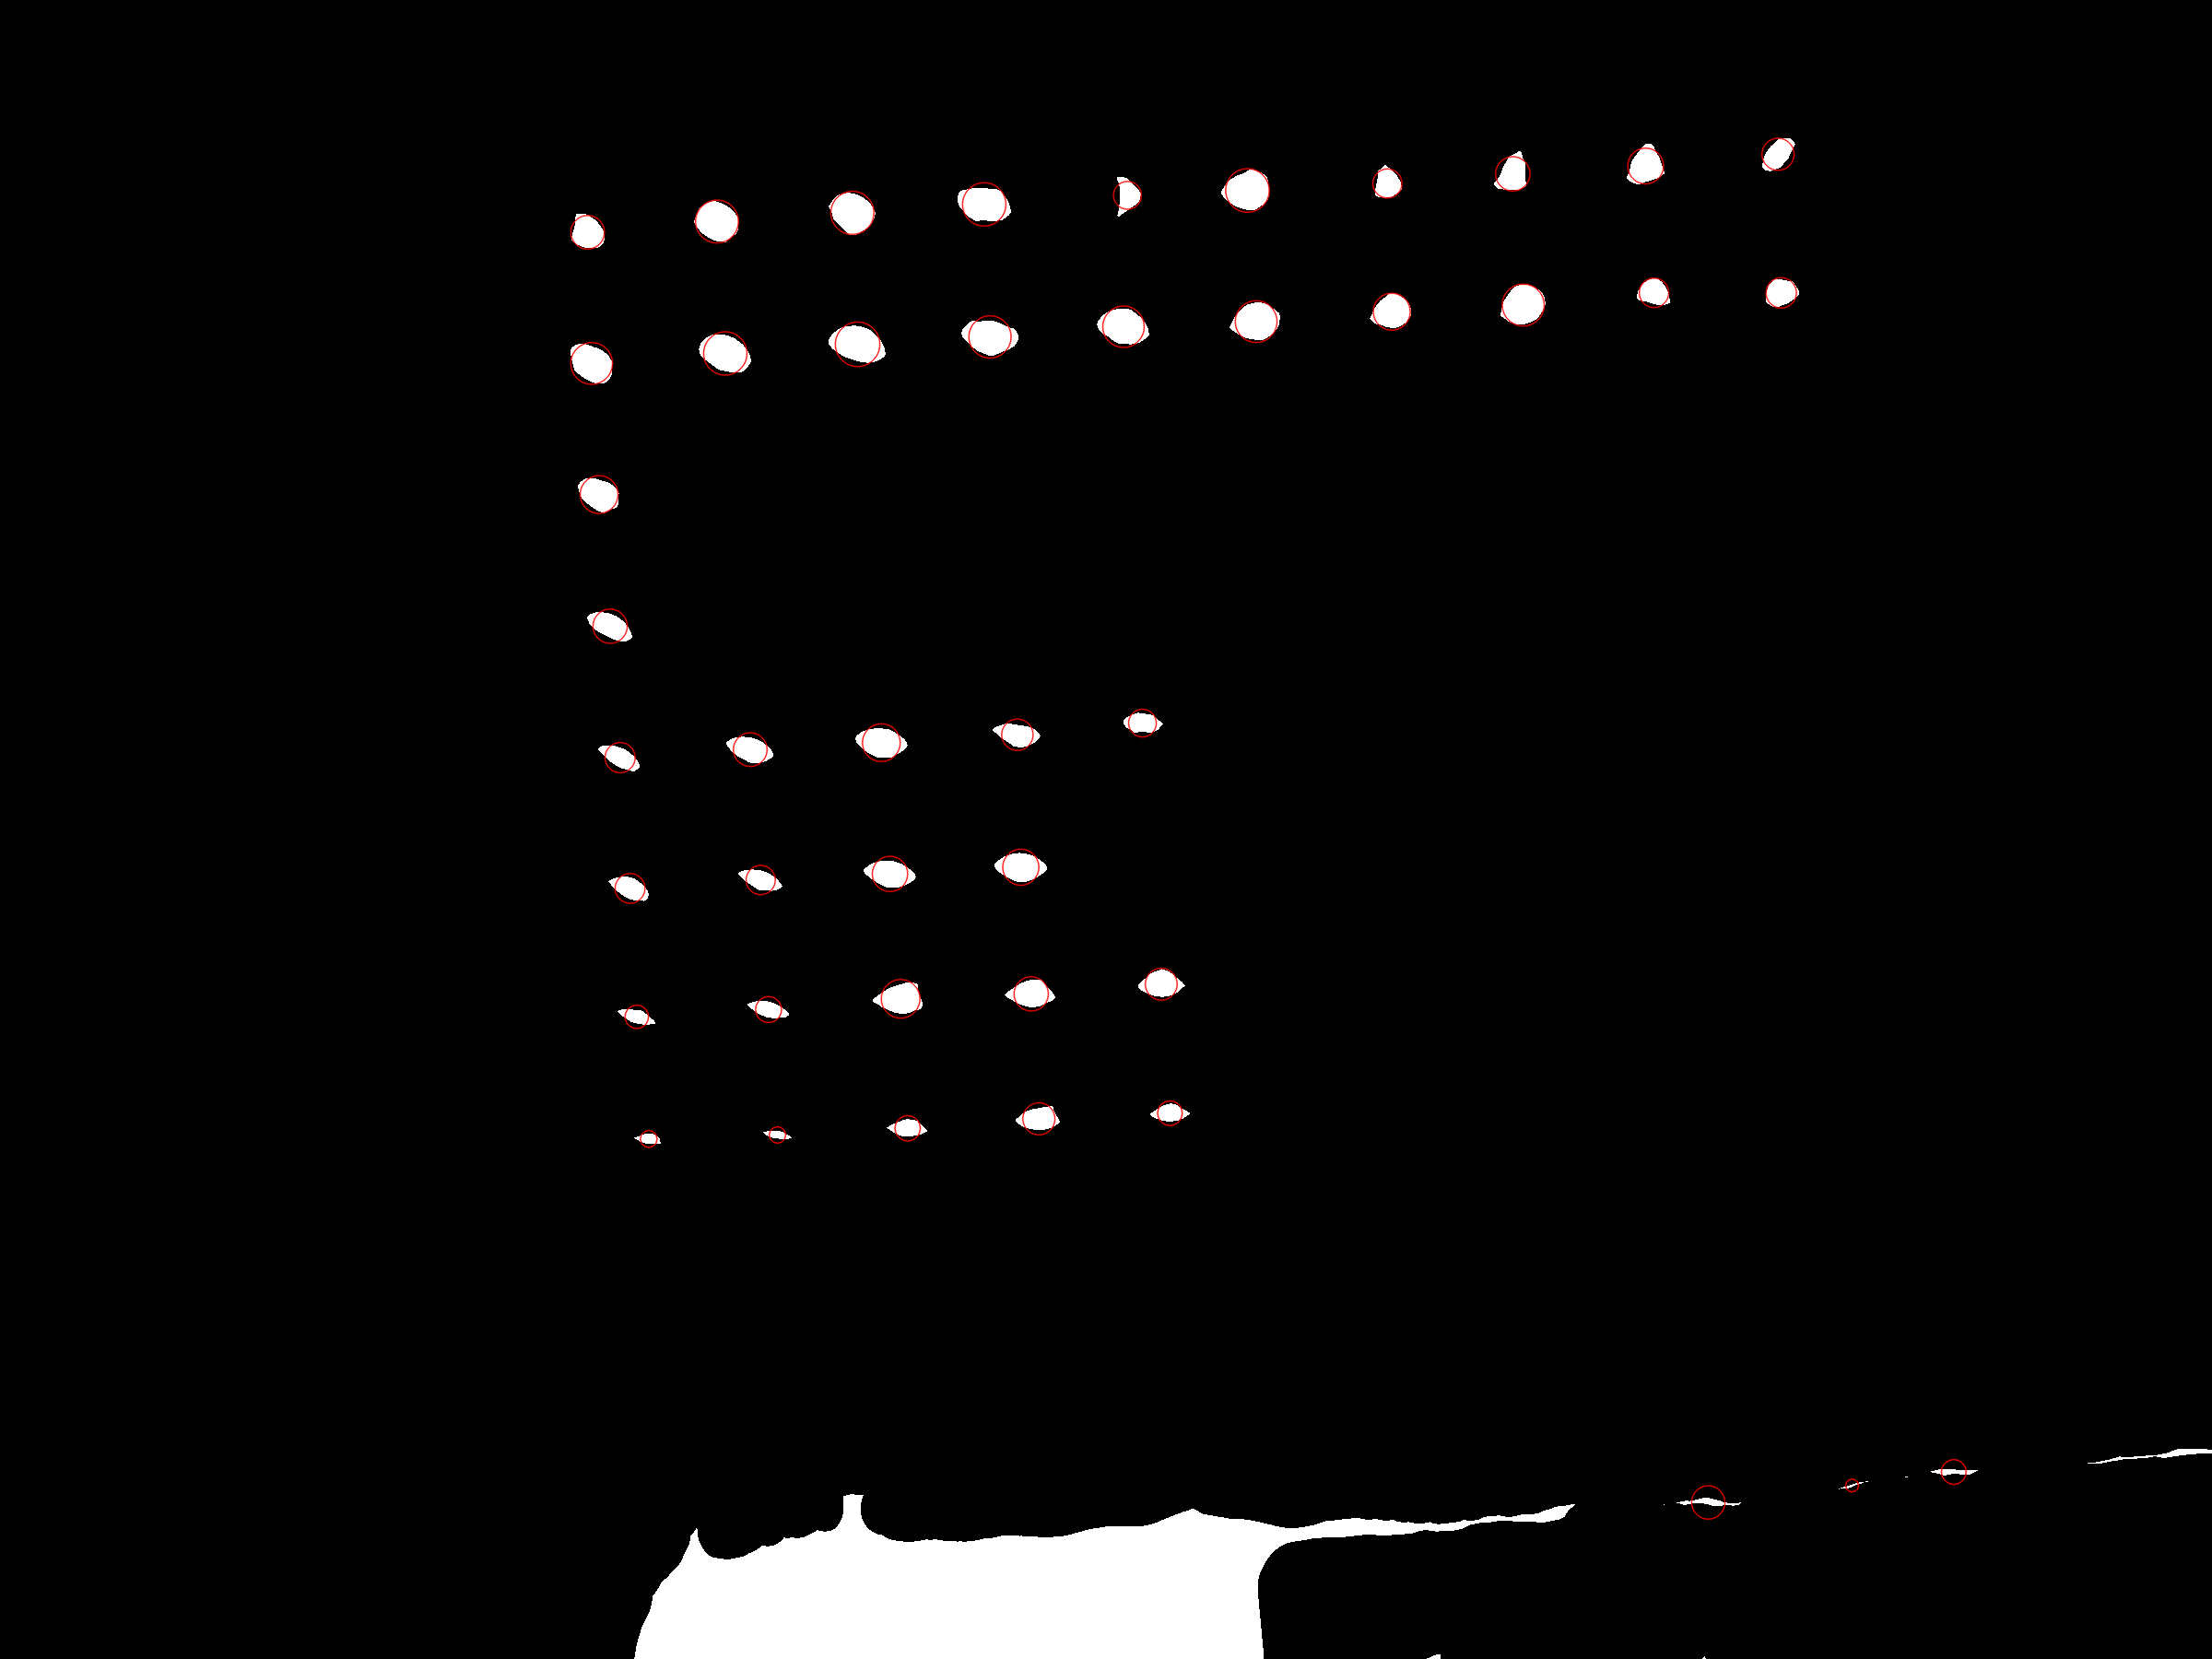

Image Number: 5383
Manual count: 44
Automatic count:  40 



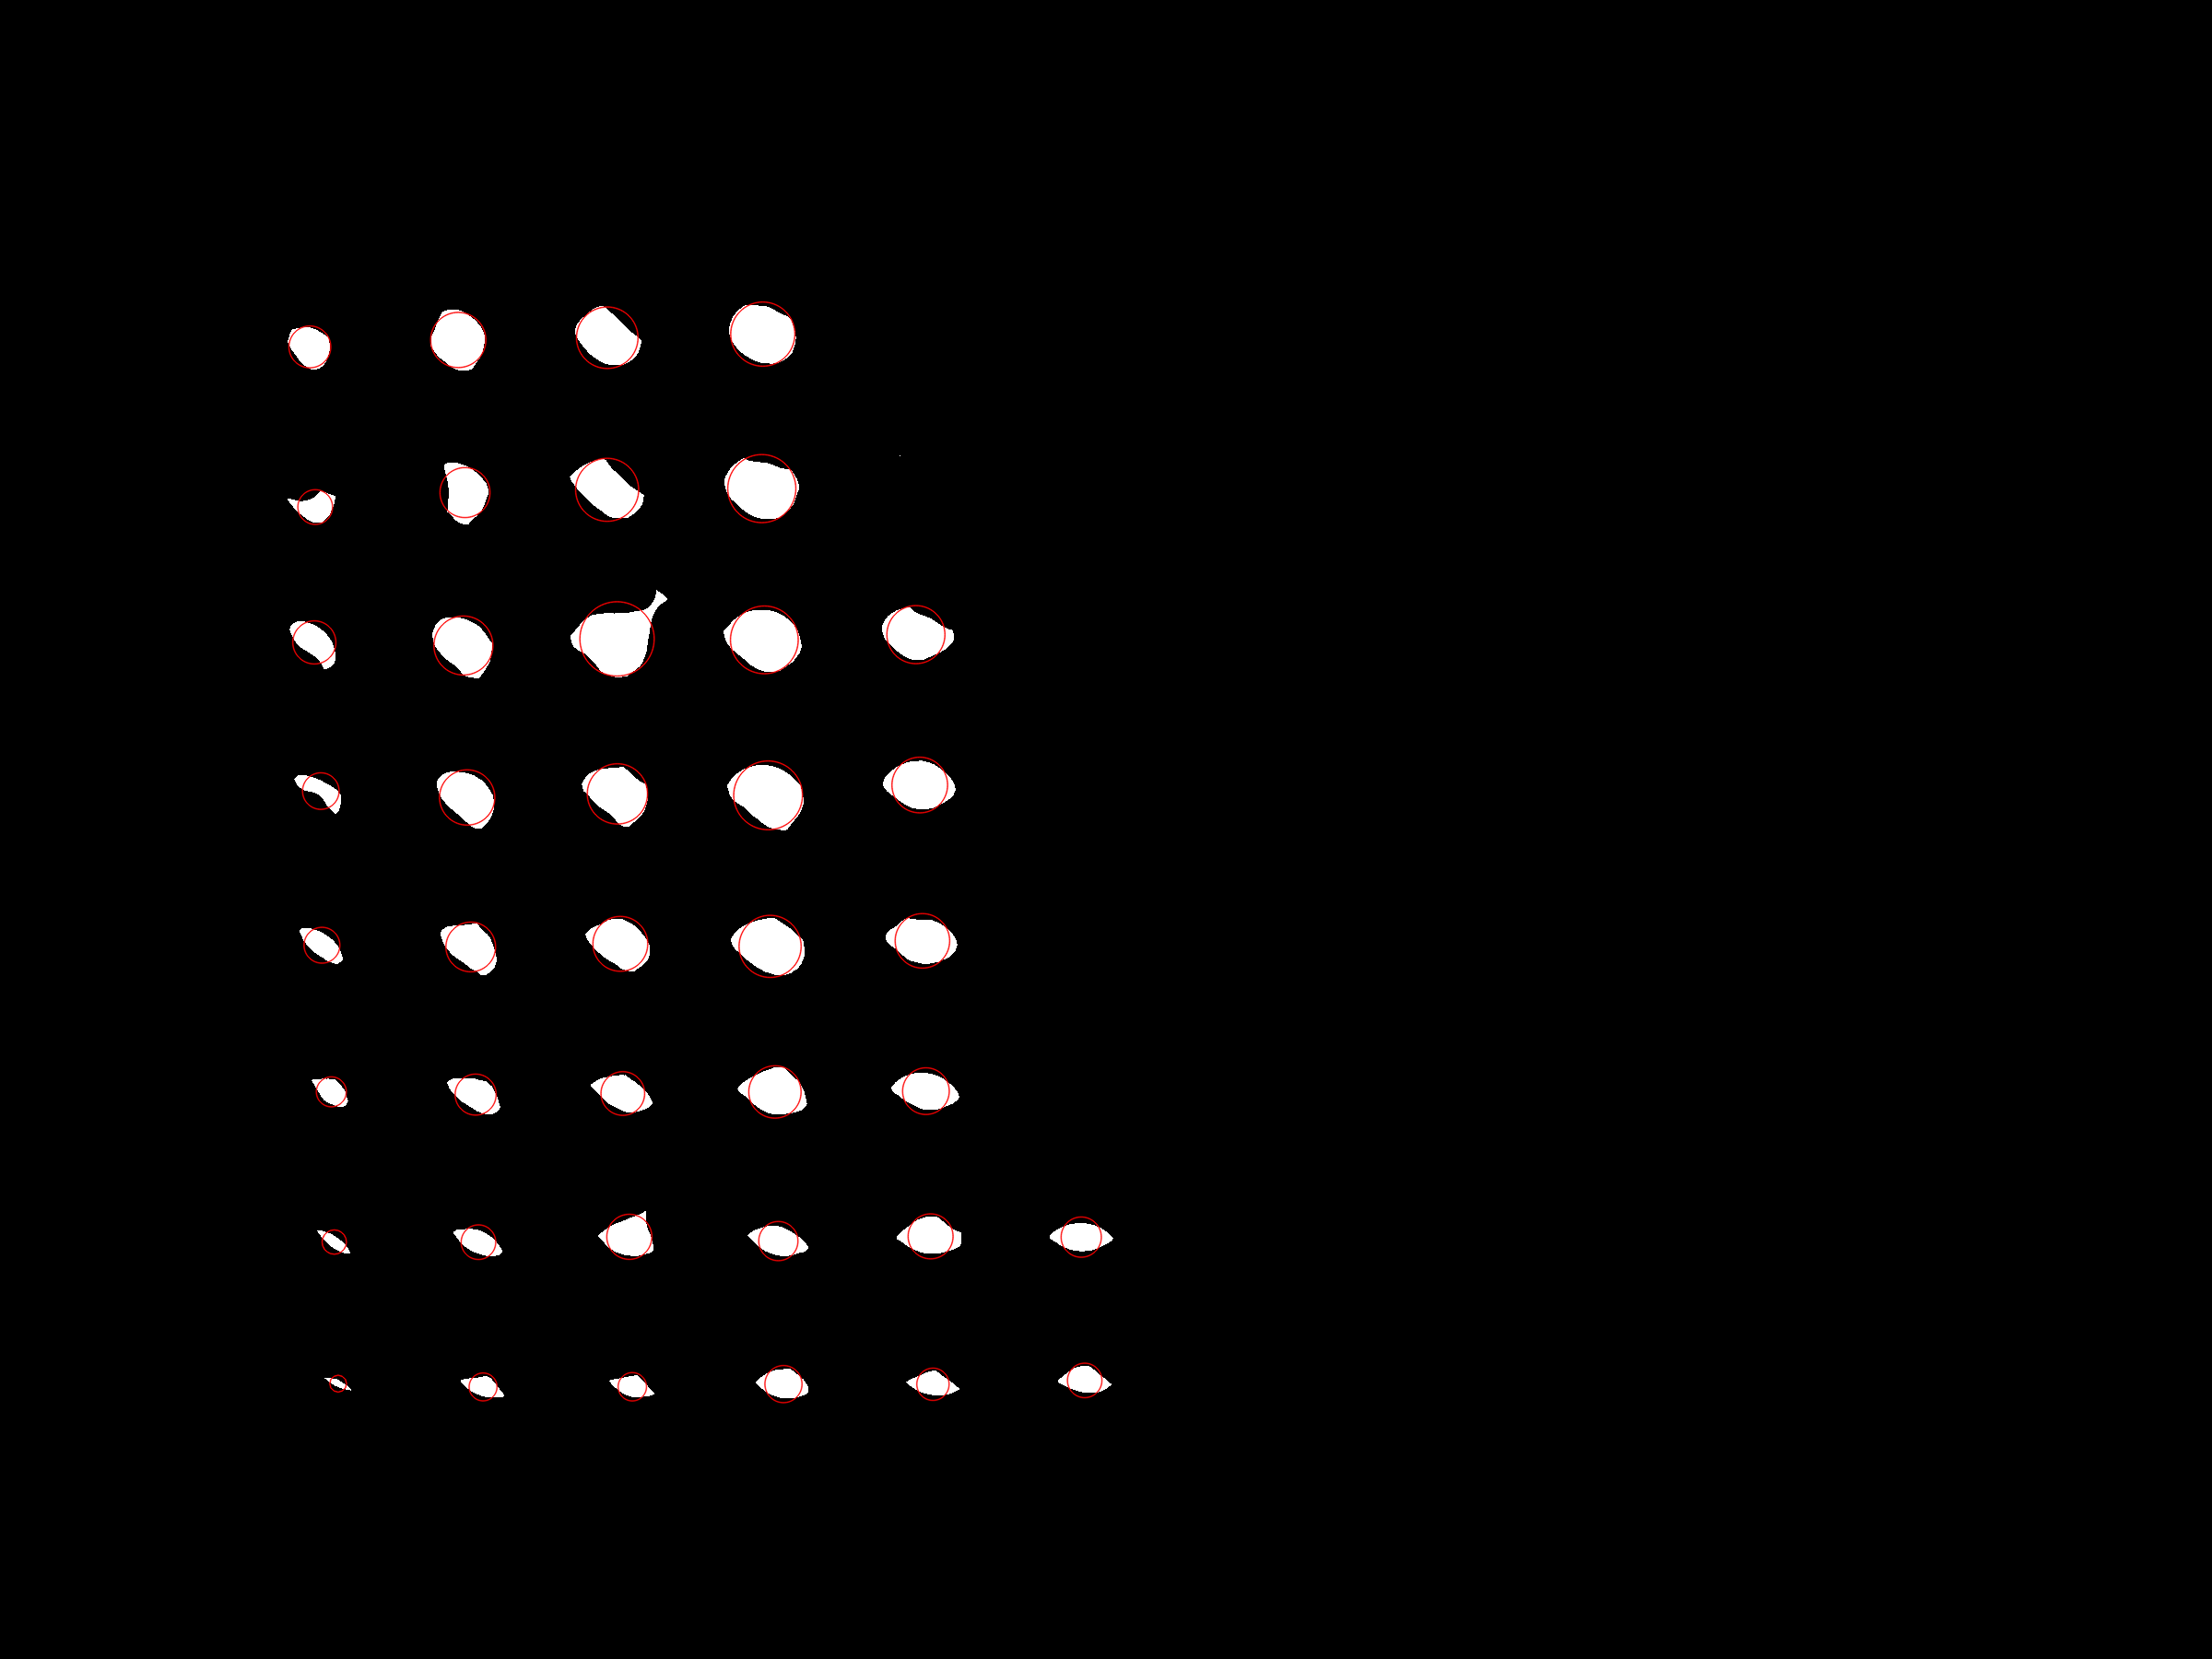

Image Number: 5384
Manual count: 32
Automatic count:  31 



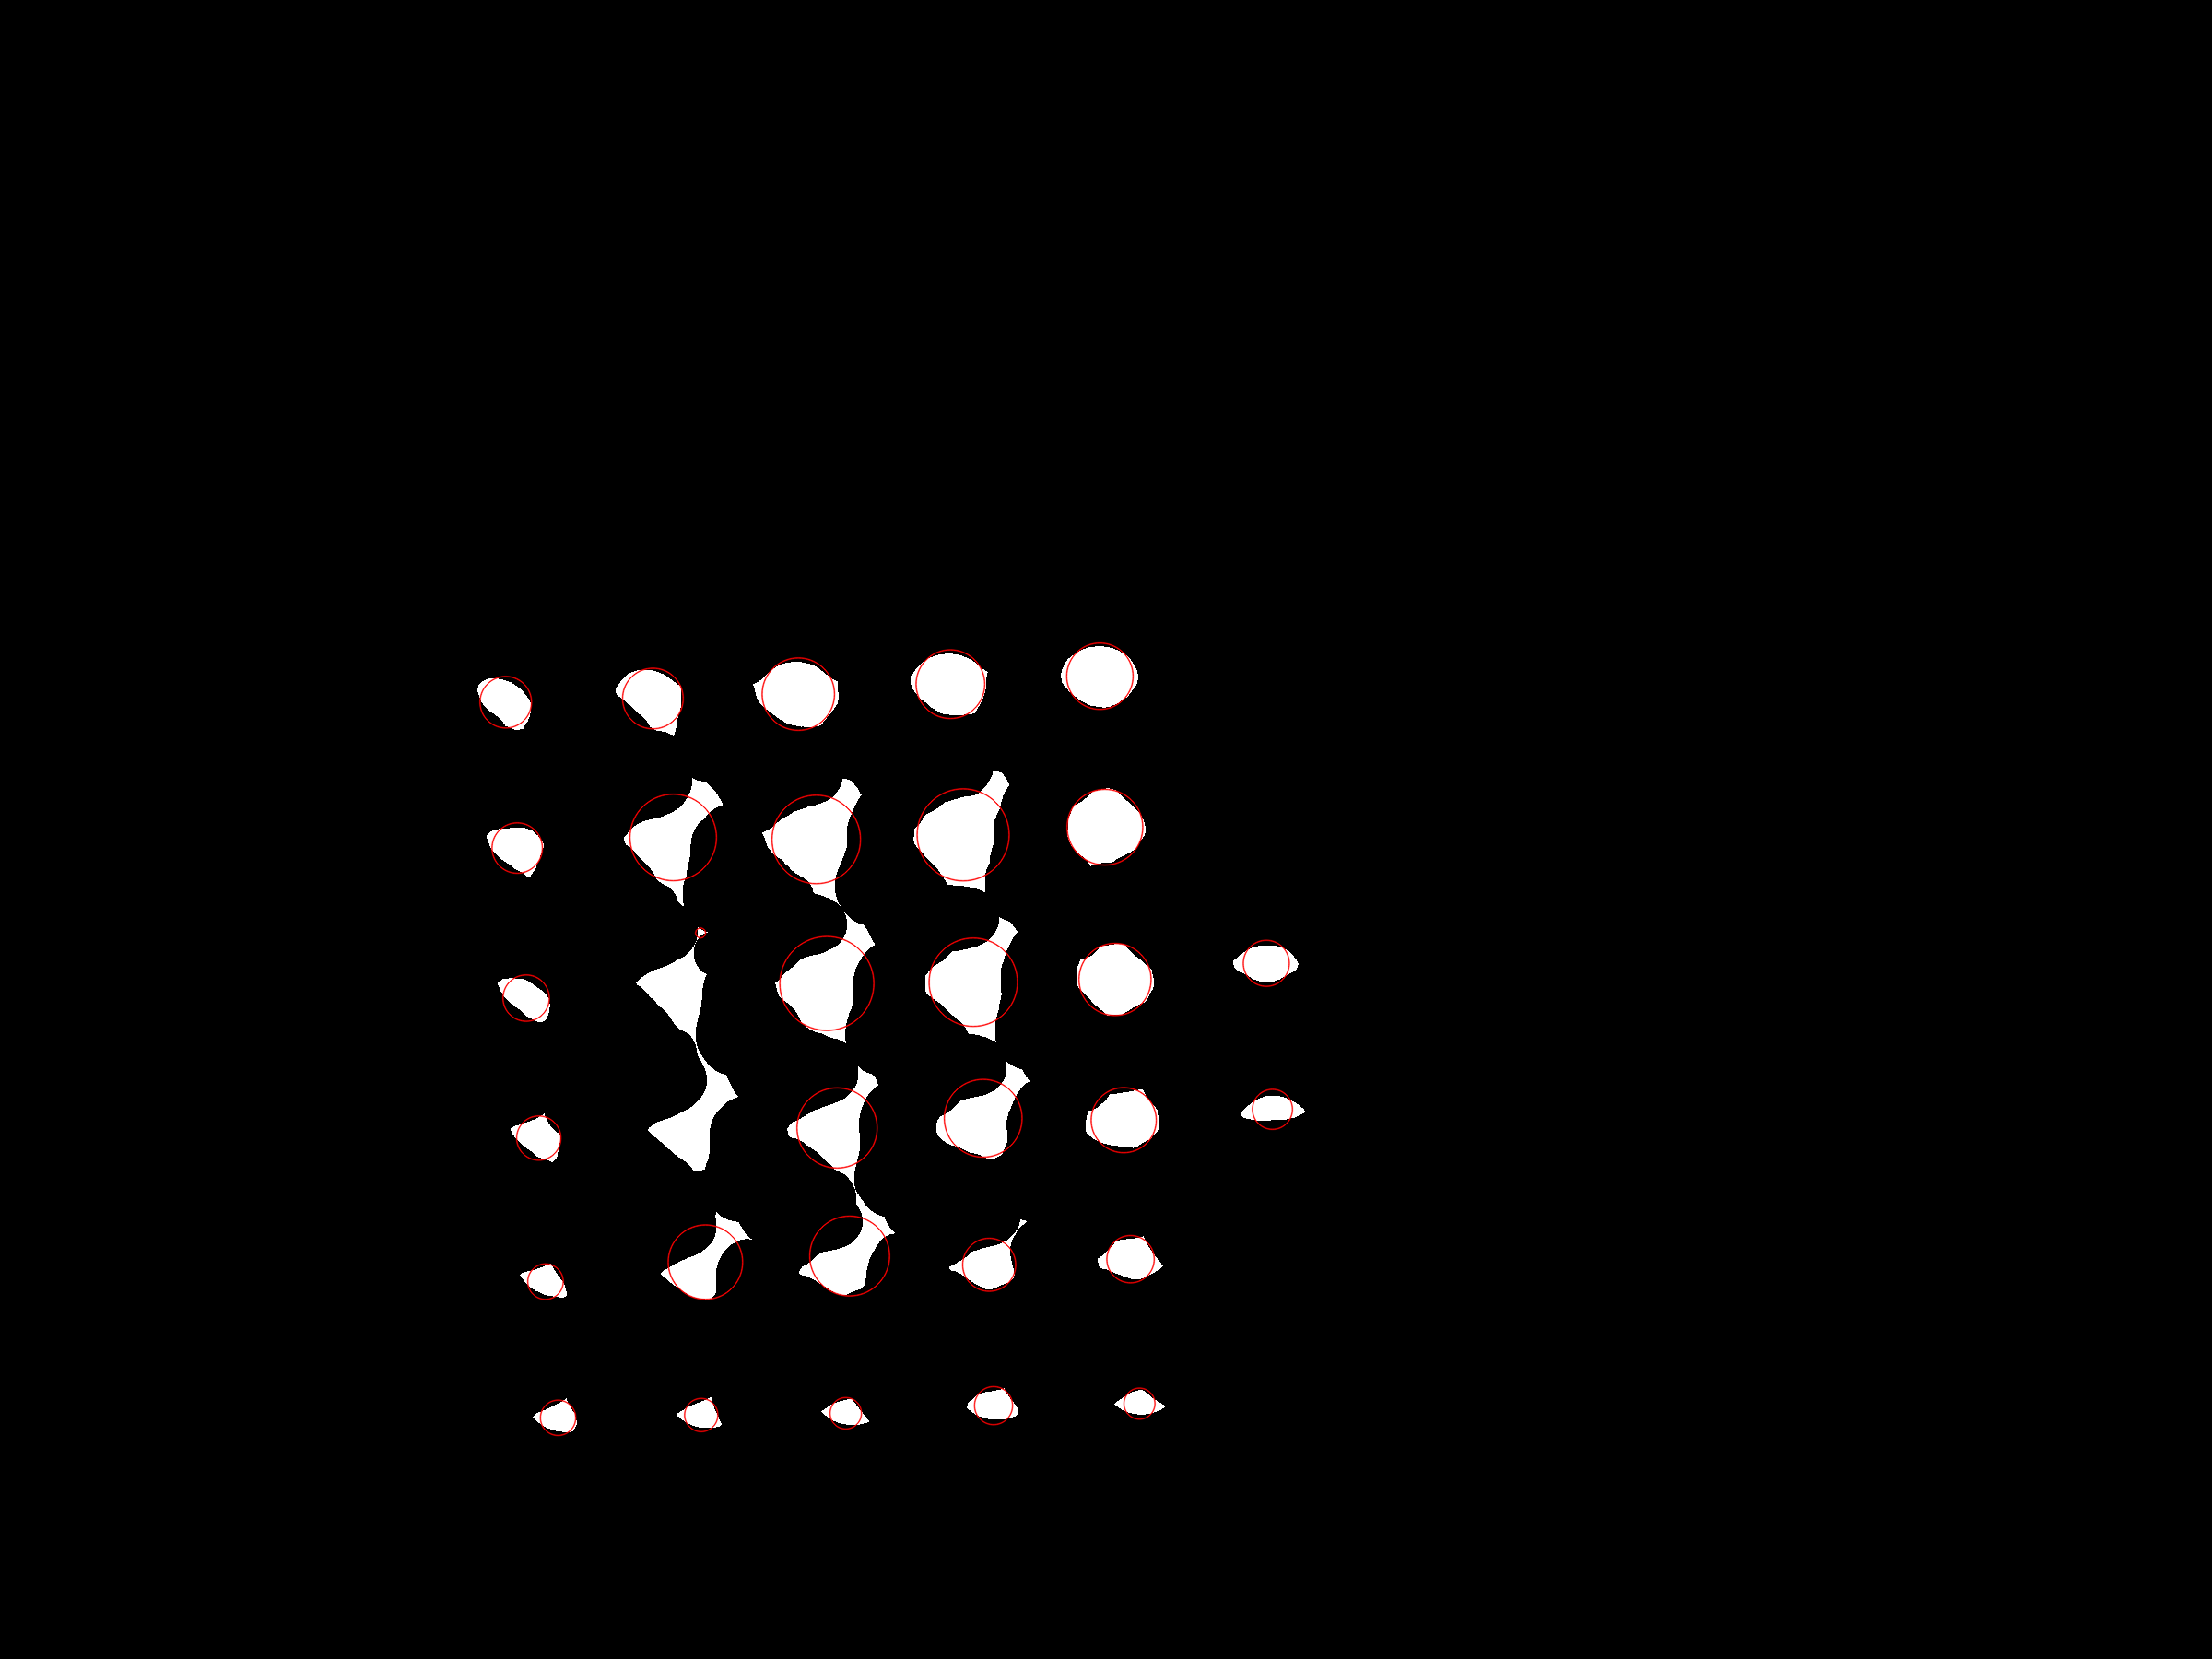

Image Number: 5385
Manual count: 51-53
Automatic count:  50 



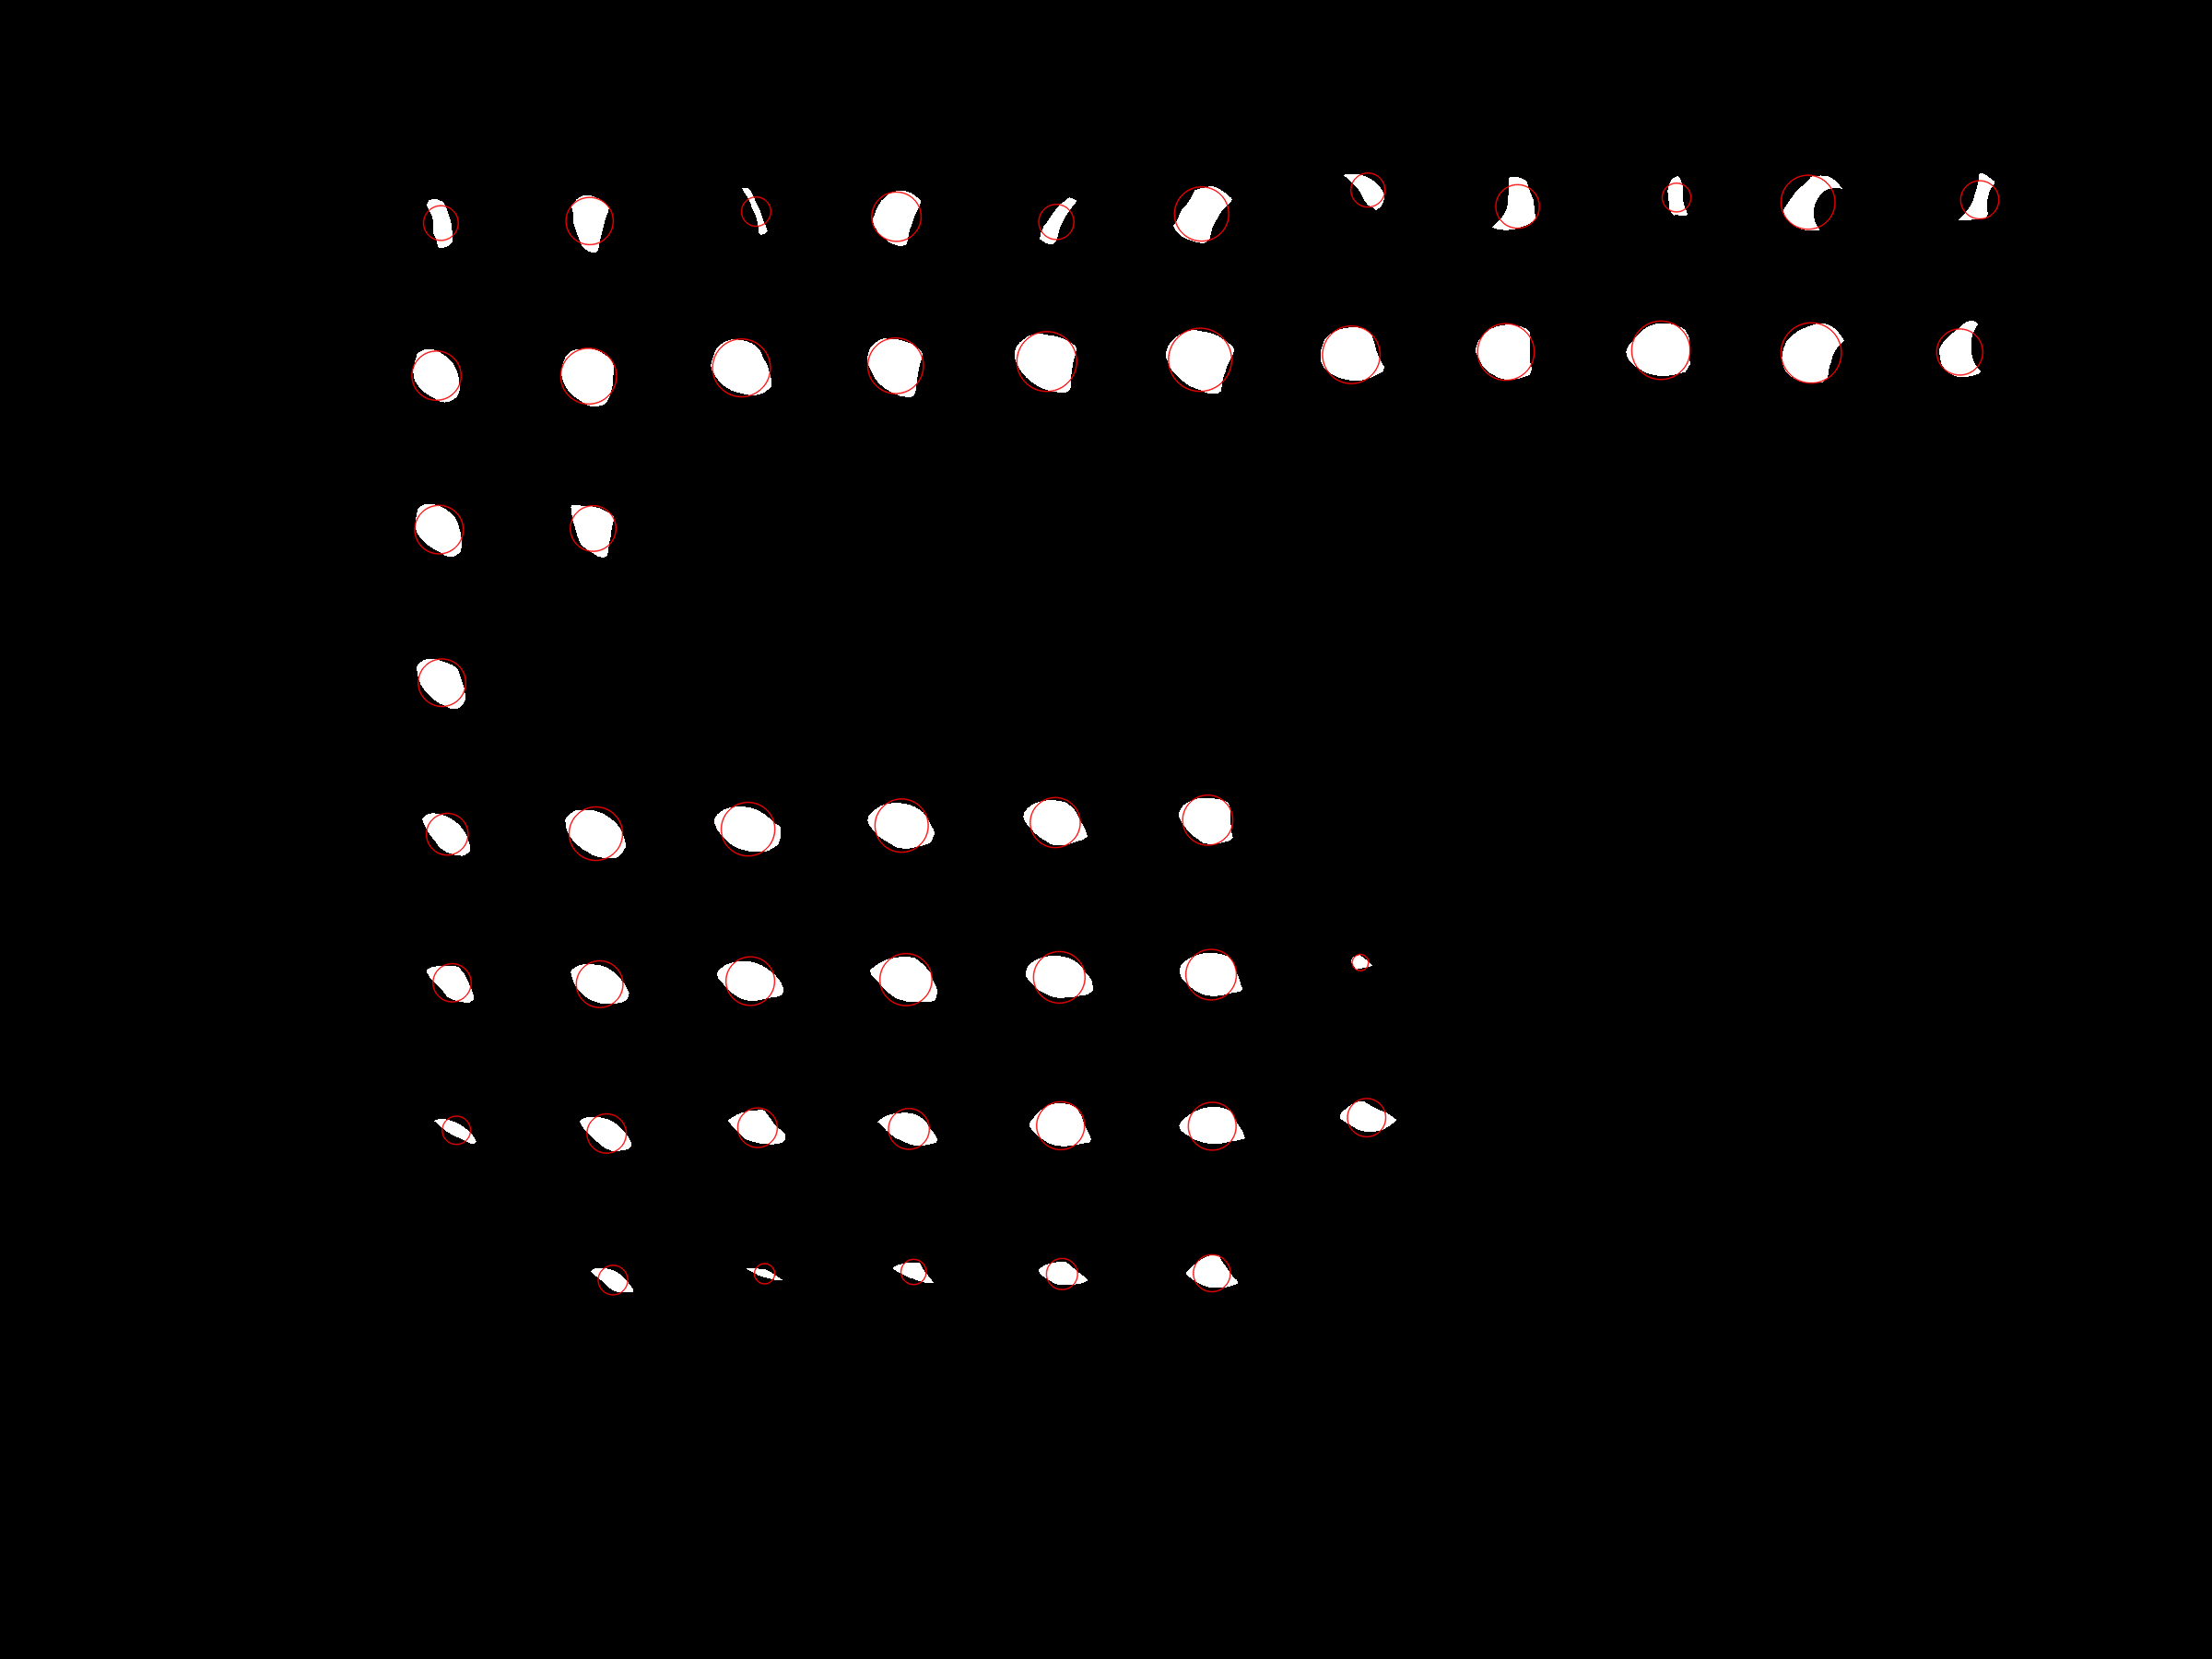

Image Number: 5386
Manual count: 50-52
Automatic count:  45 



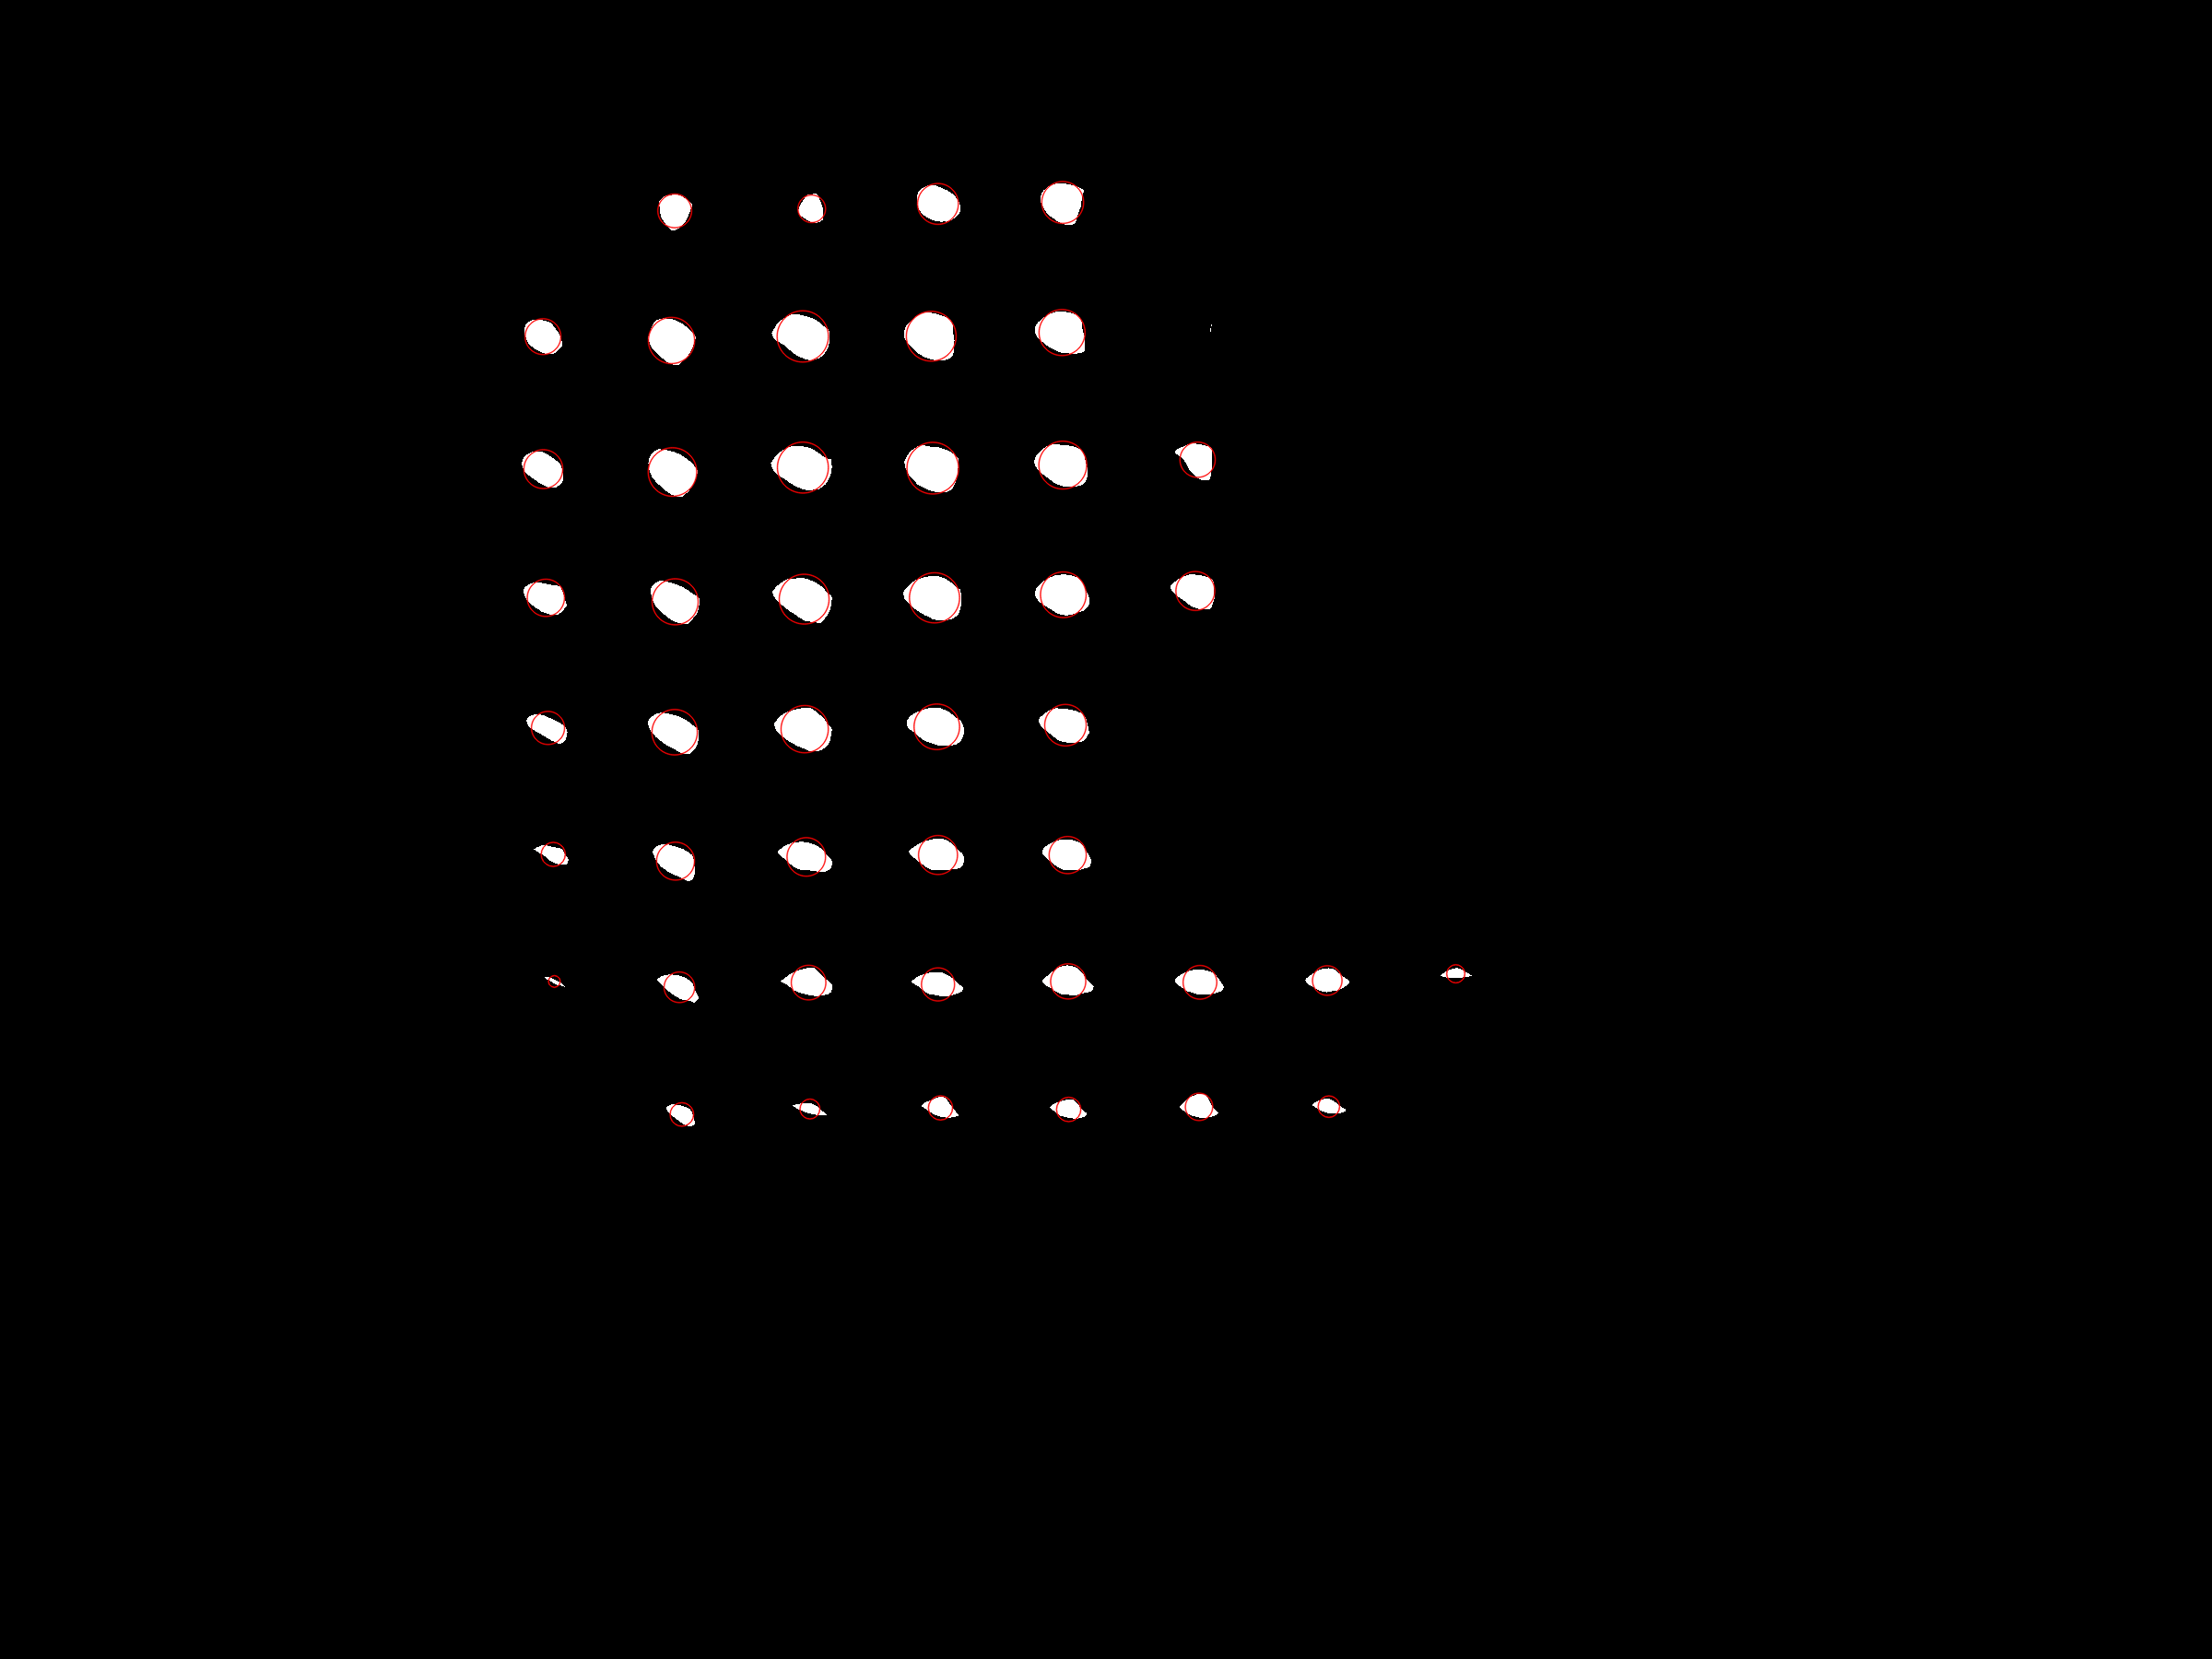

Image Number: 5387
Manual count: 46-51
Automatic count:  47 



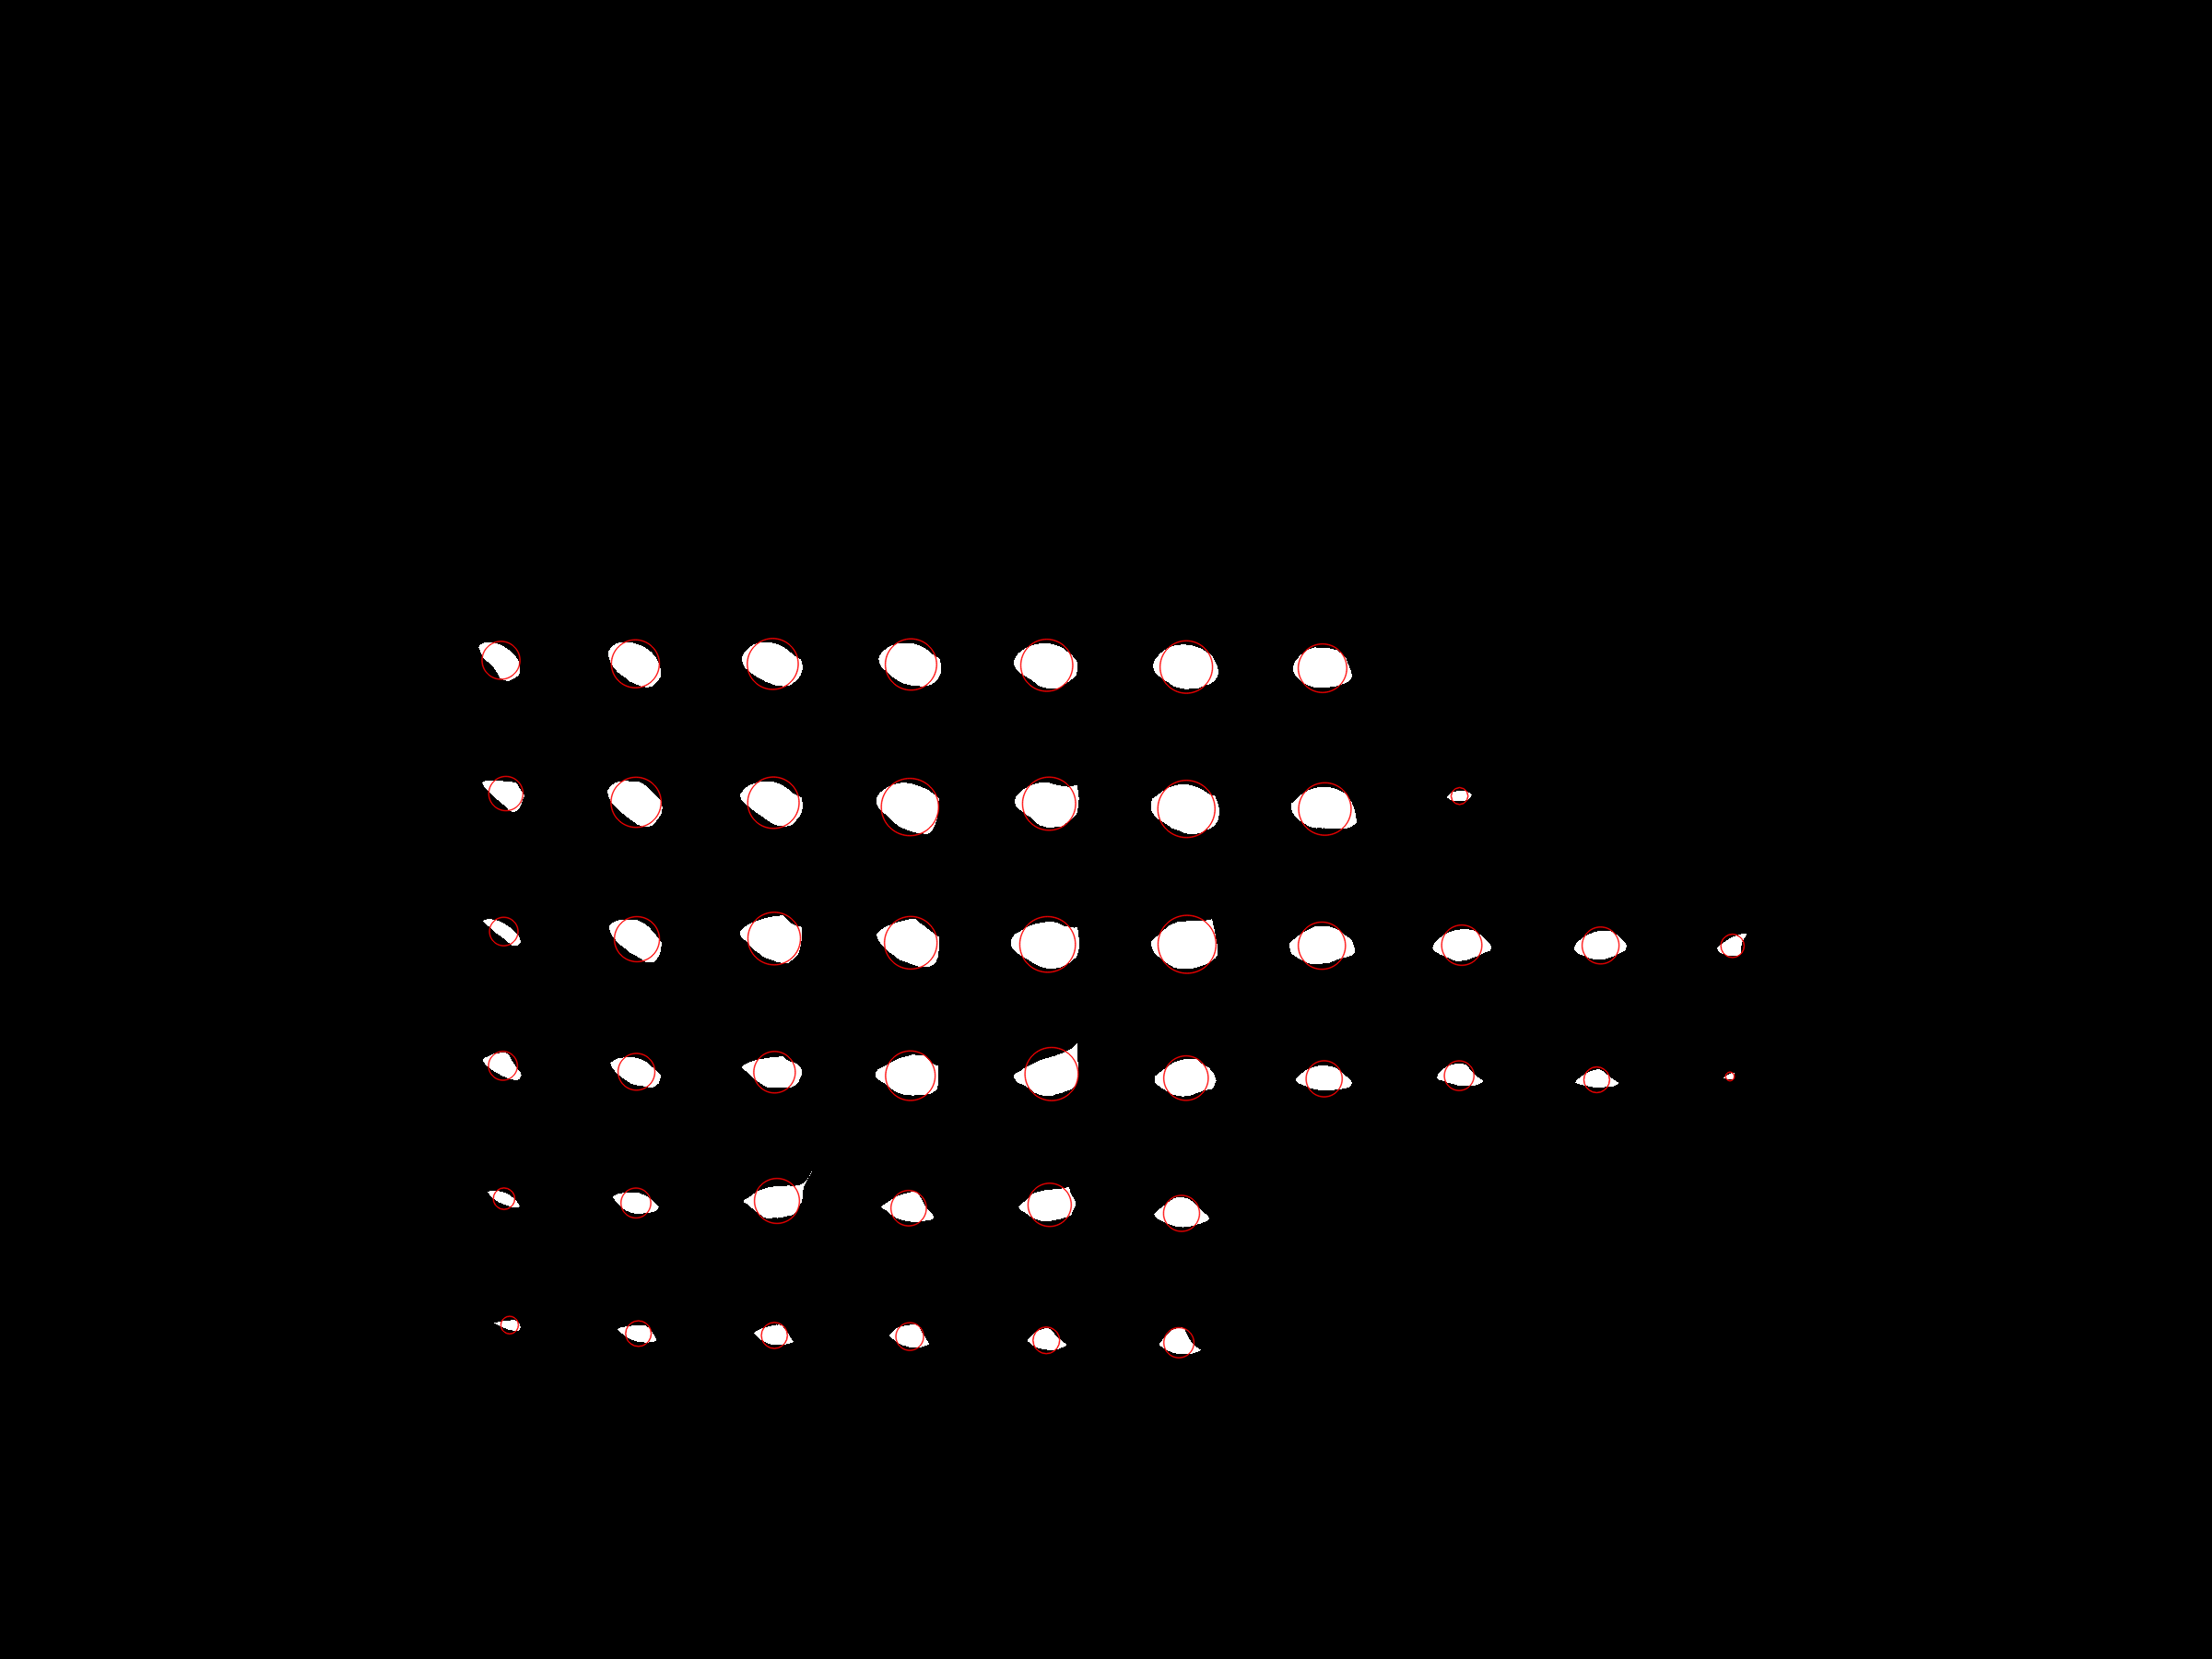

Image Number: 5388
Manual count: 70-71
Automatic count:  60 



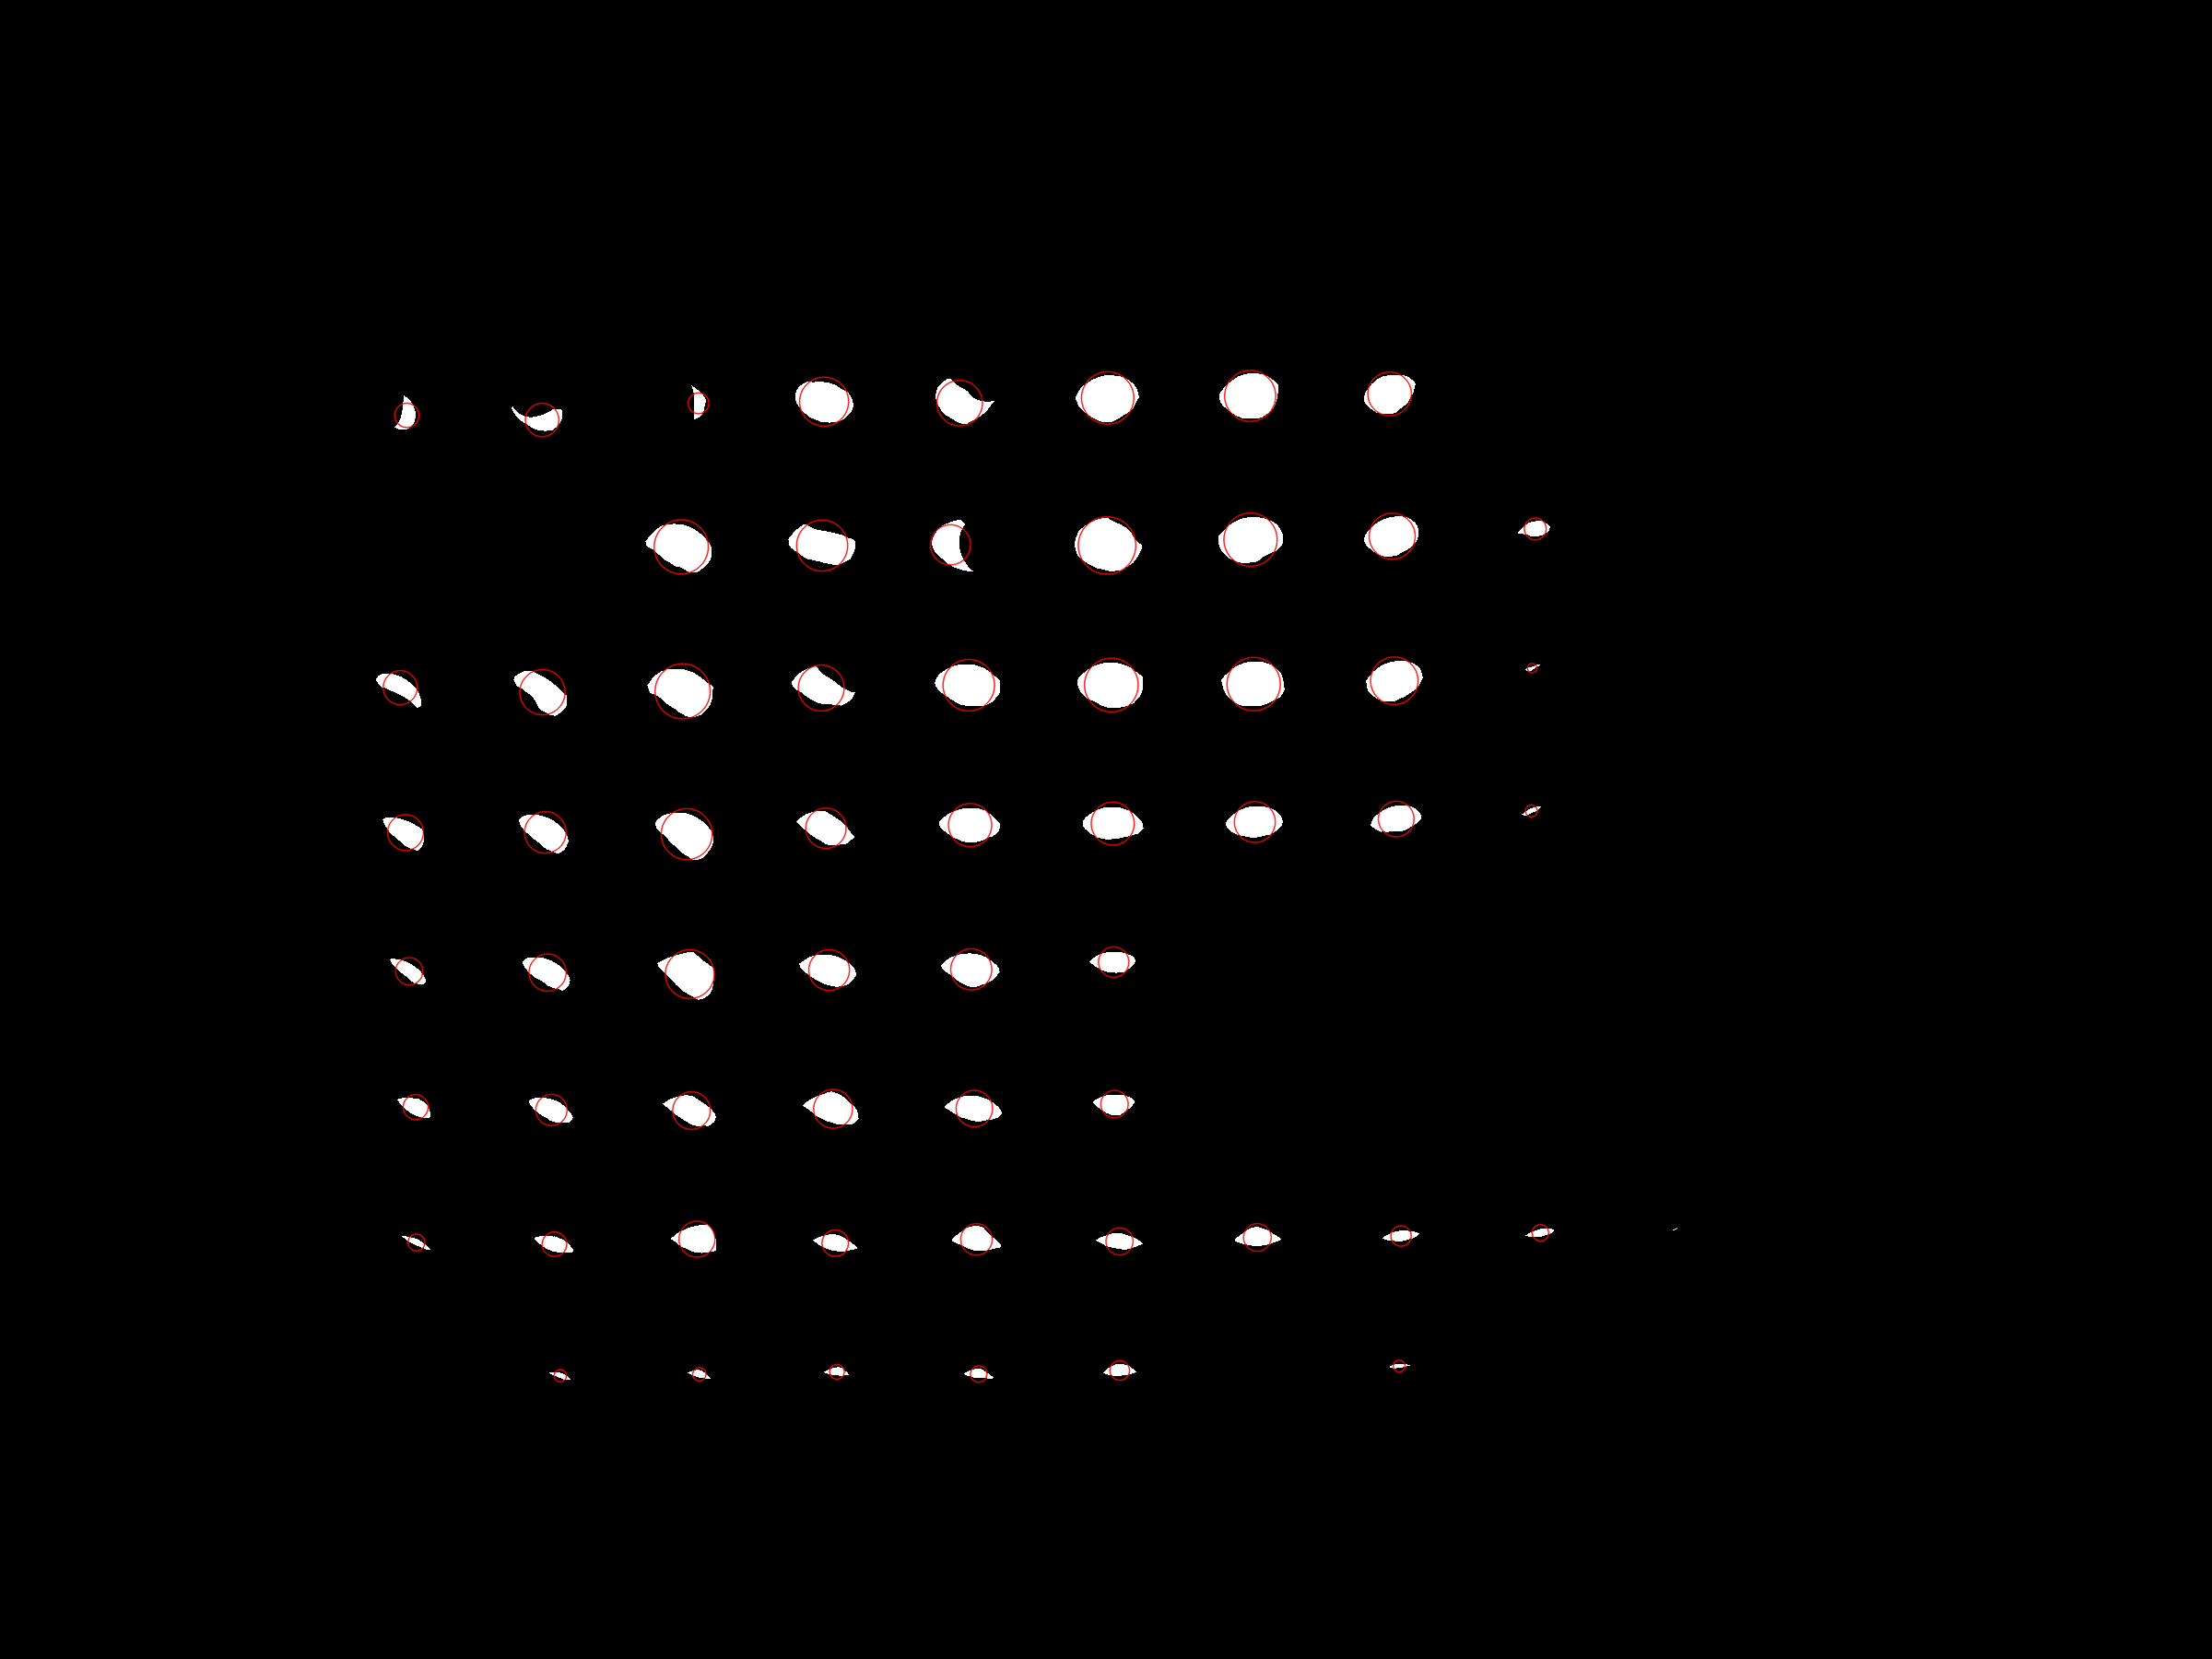

Image Number: 5389
Manual count: 54-56
Automatic count:  53 



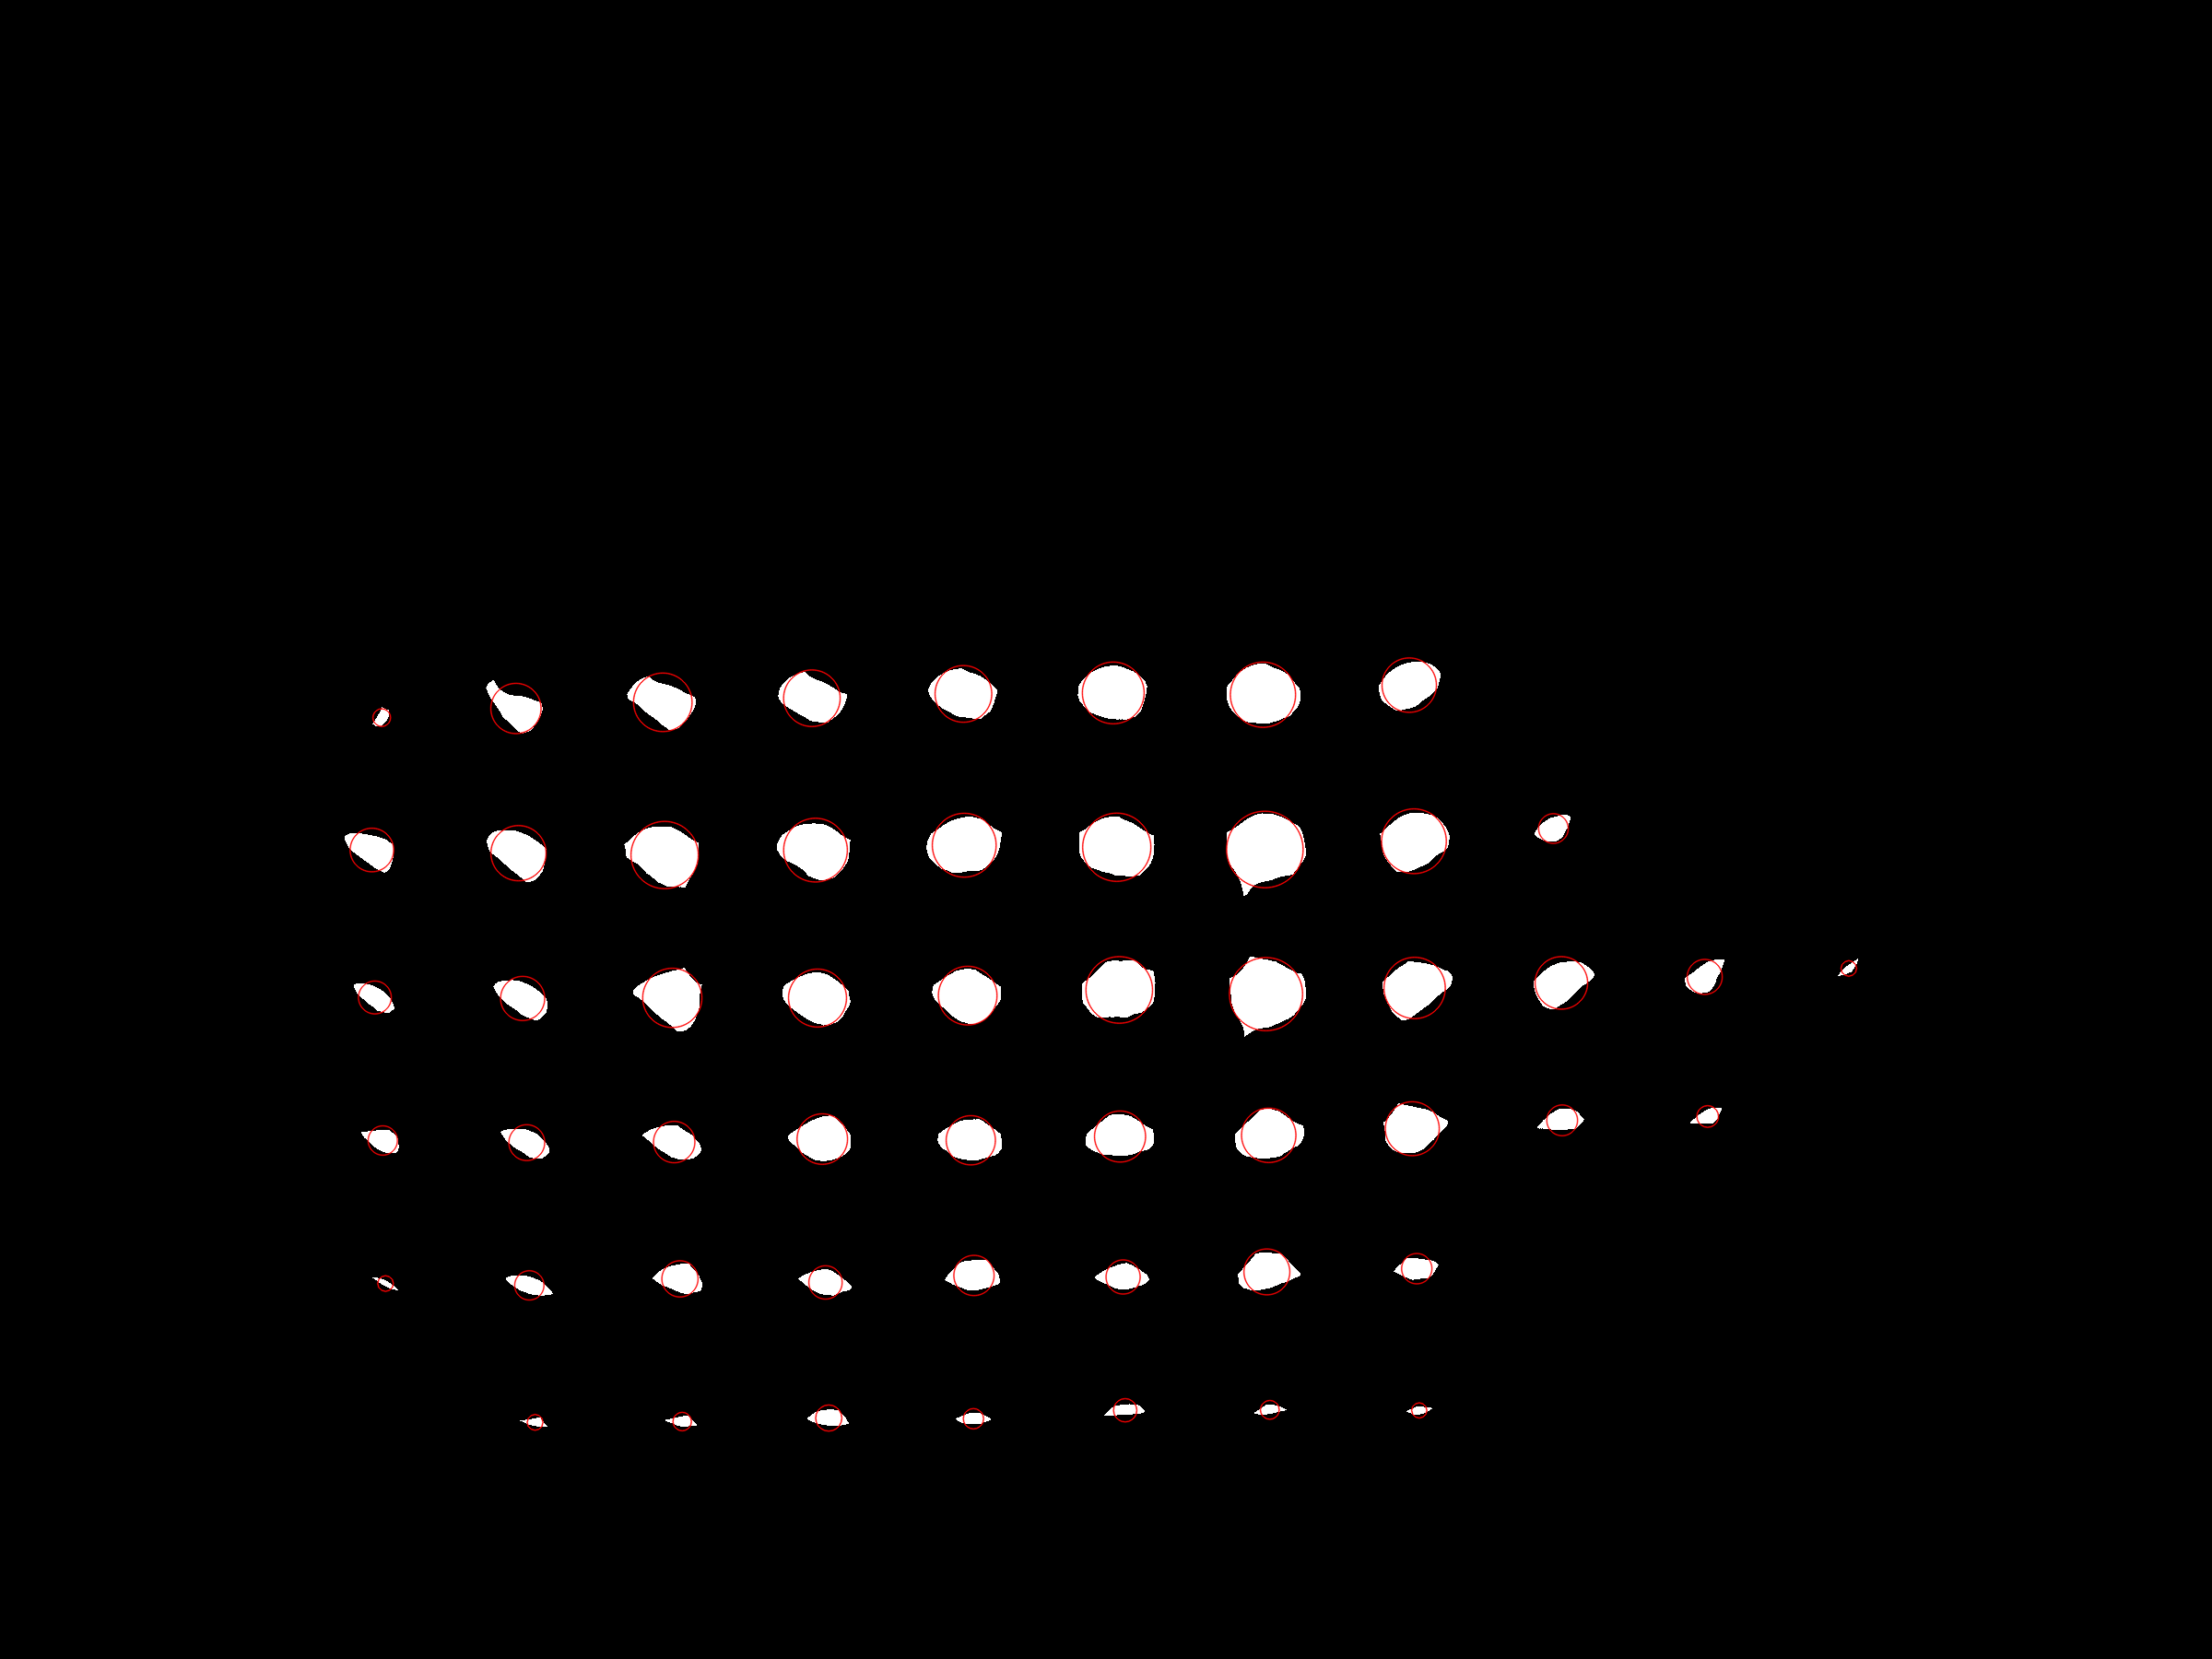

Image Number: 5390
Manual count: 58-59
Automatic count:  53 



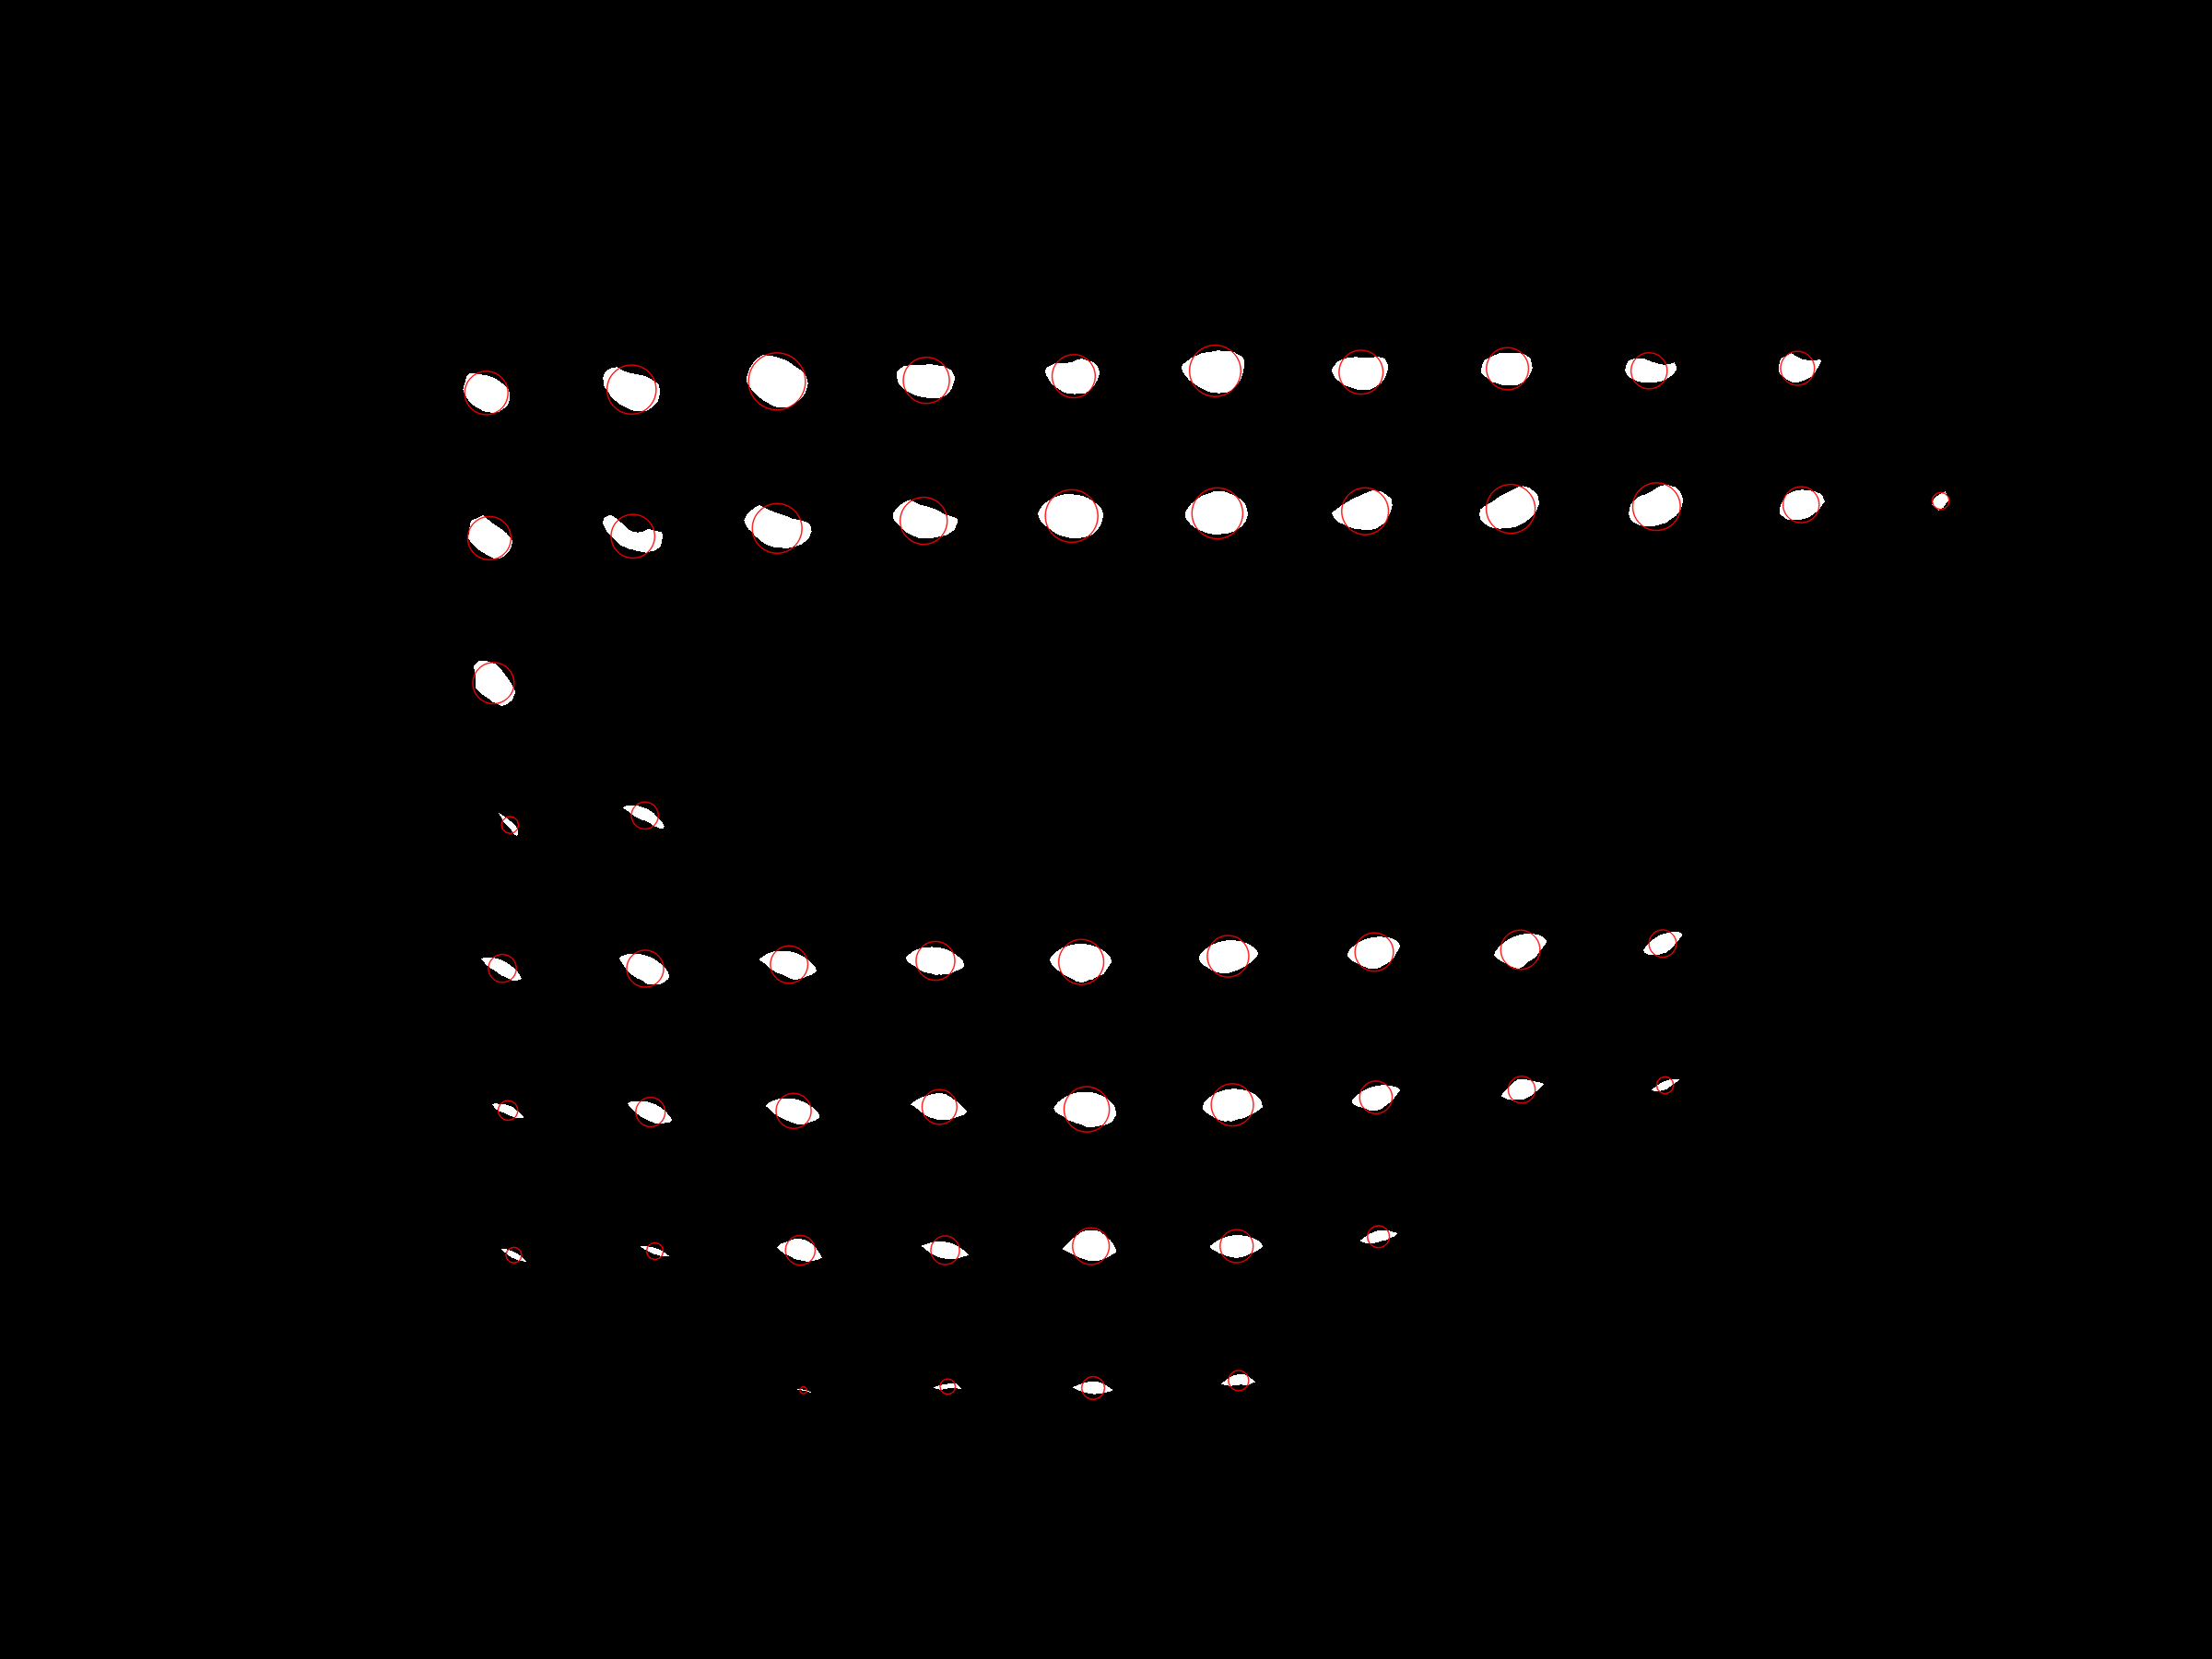

Image Number: 5391
Manual count: 38-43
Automatic count:  25 



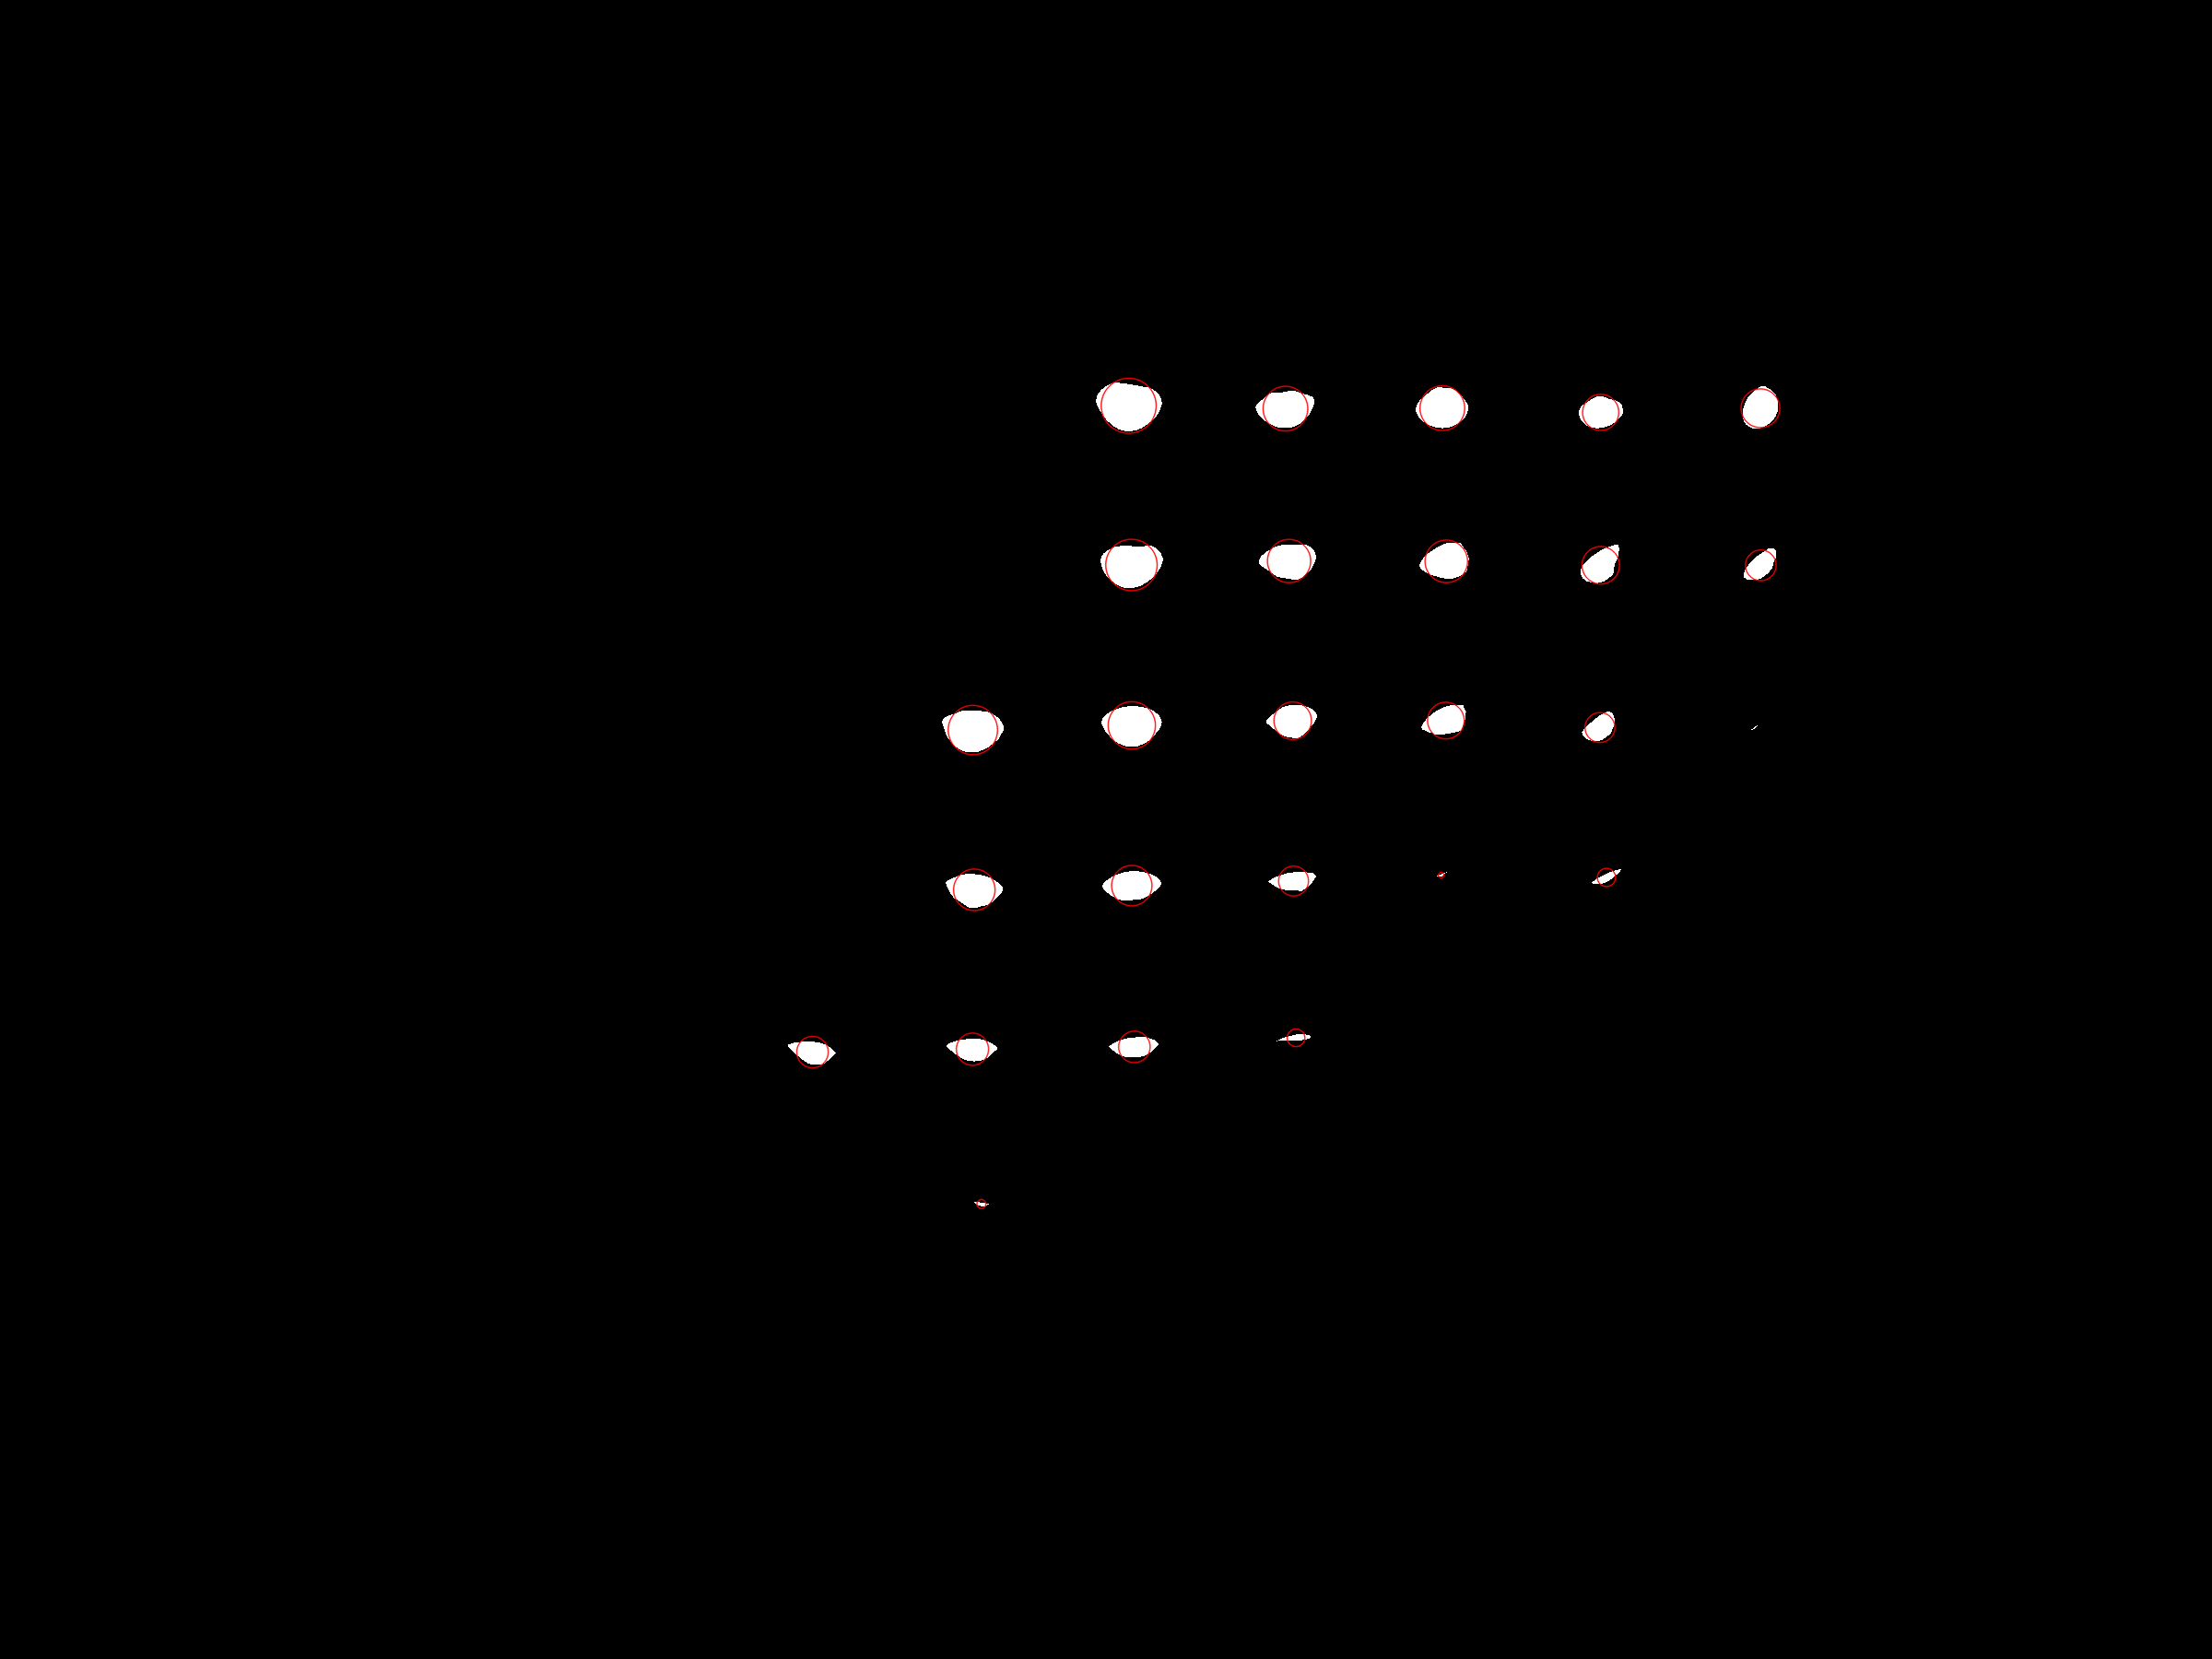

Image Number: 5392
Manual count: 62-64
Automatic count:  23 



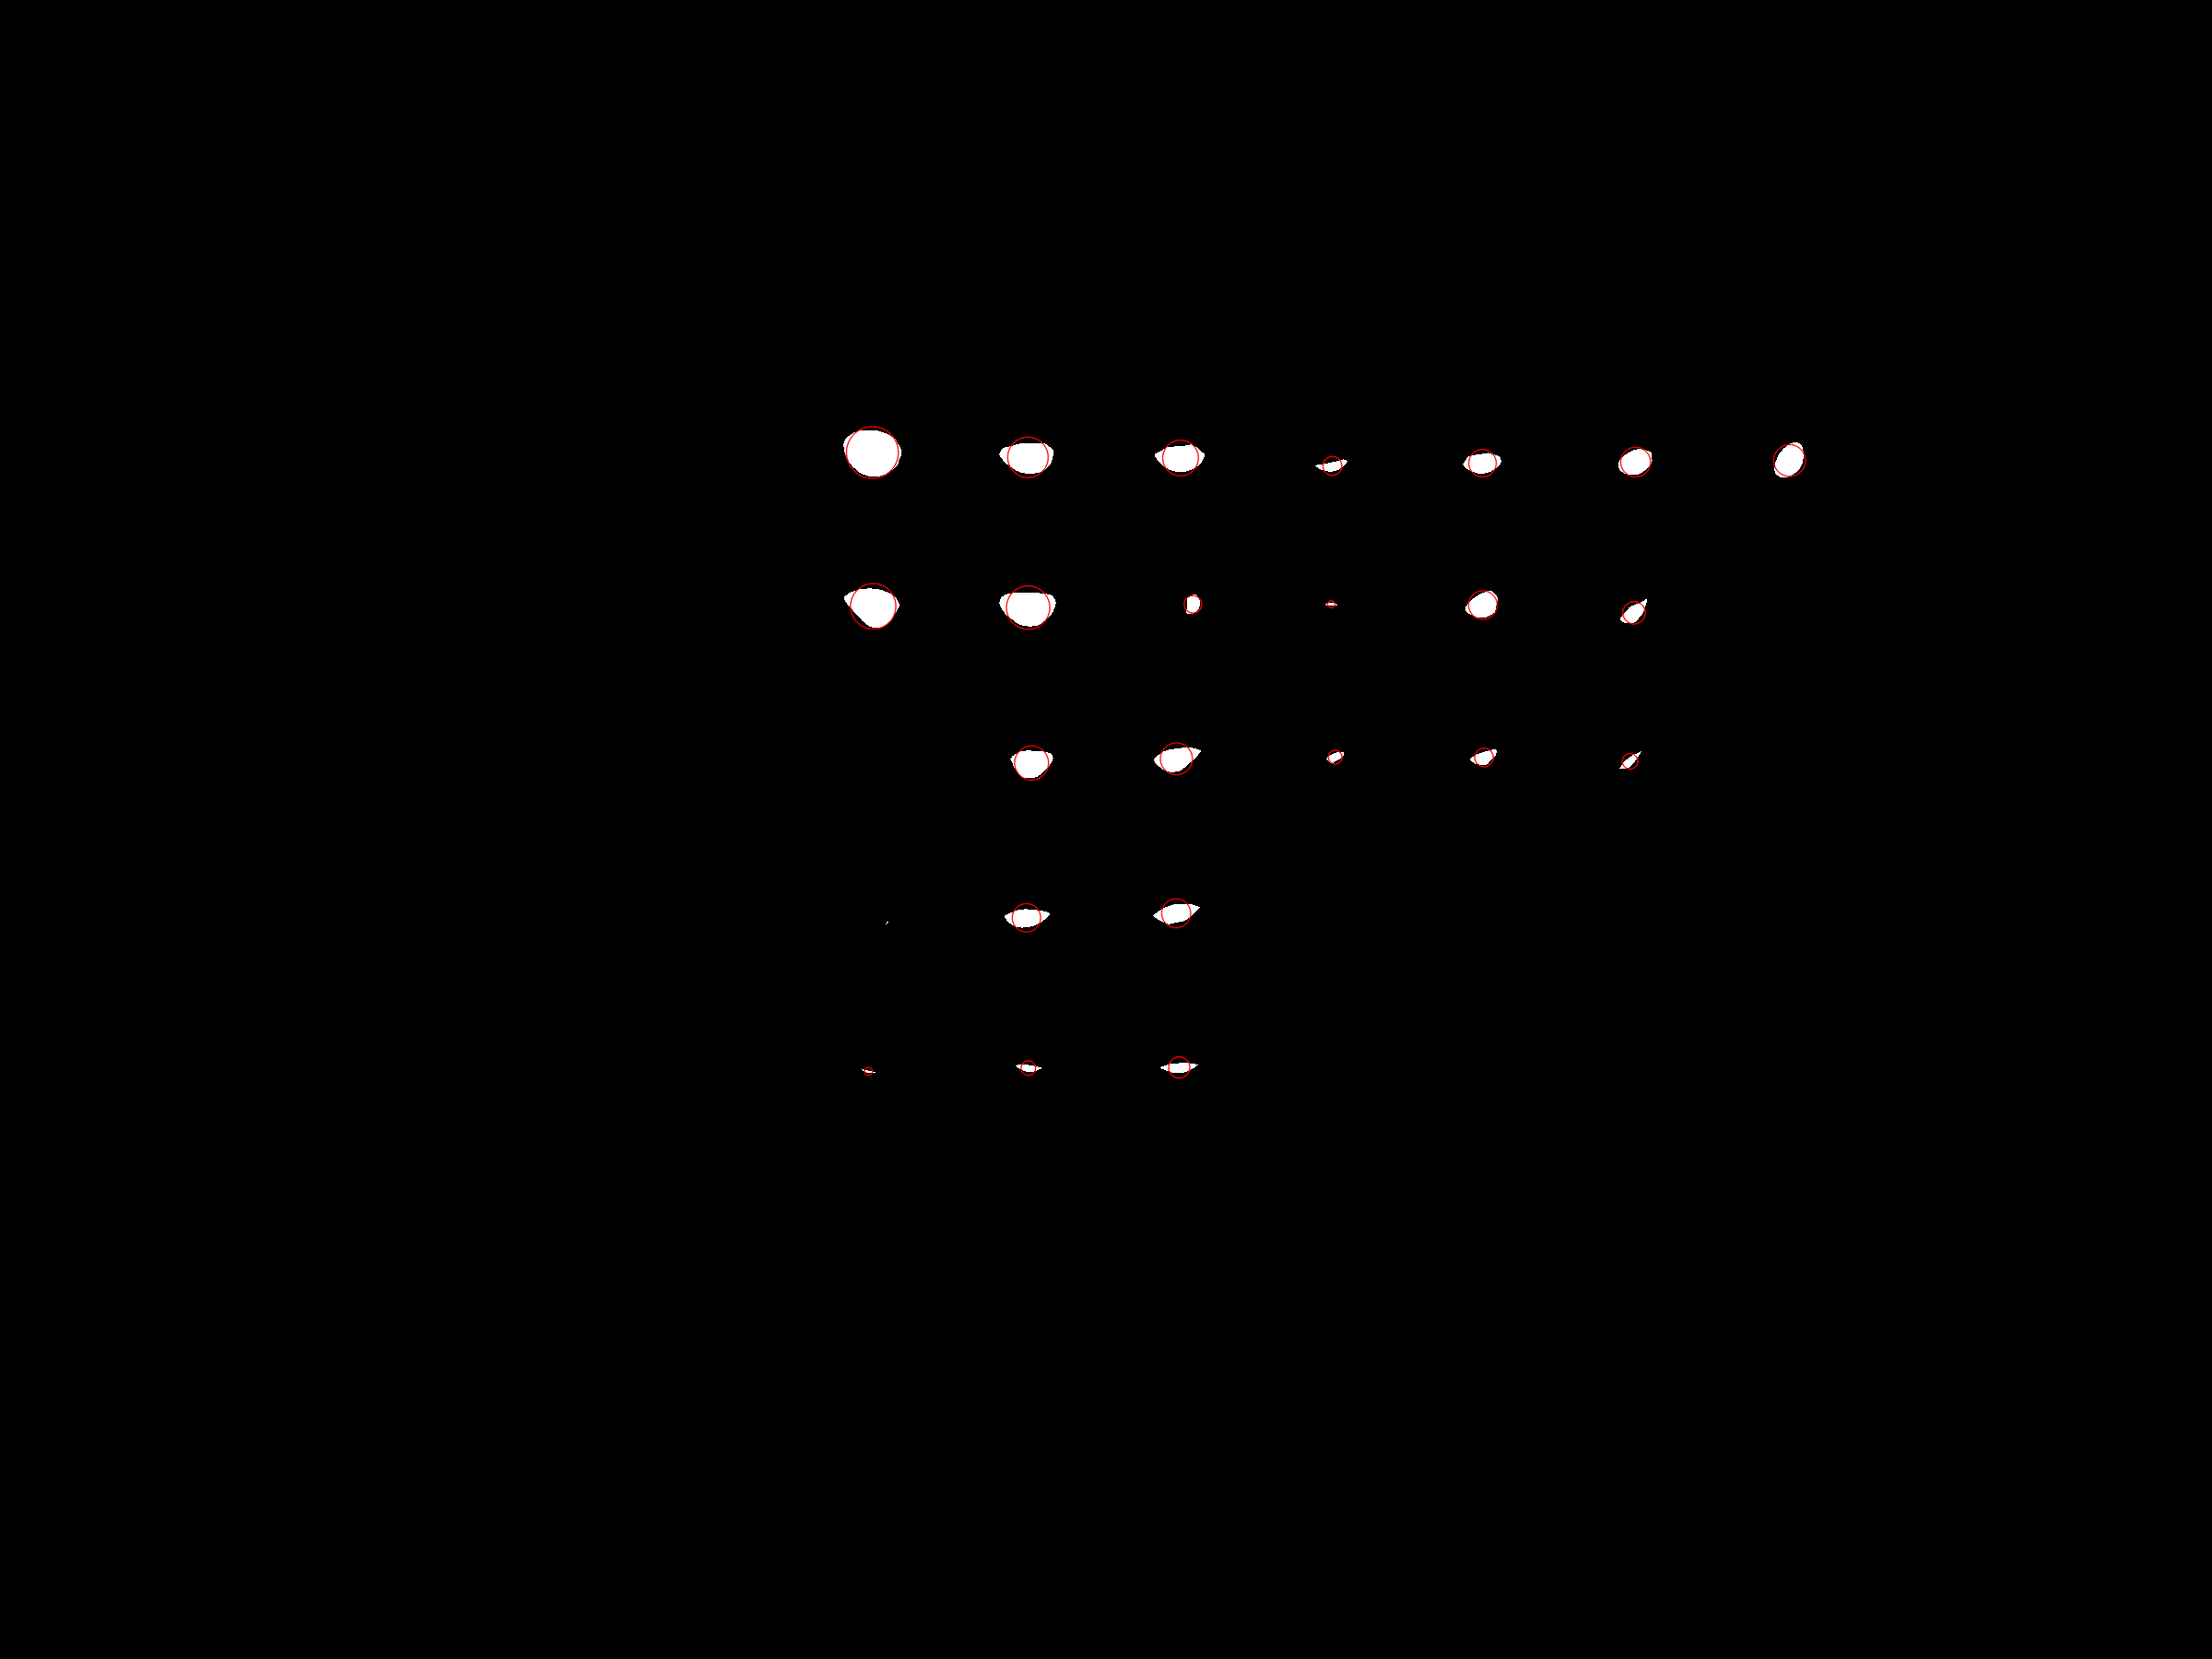

Image Number: 5393
Manual count: 60-62
Automatic count:  35 



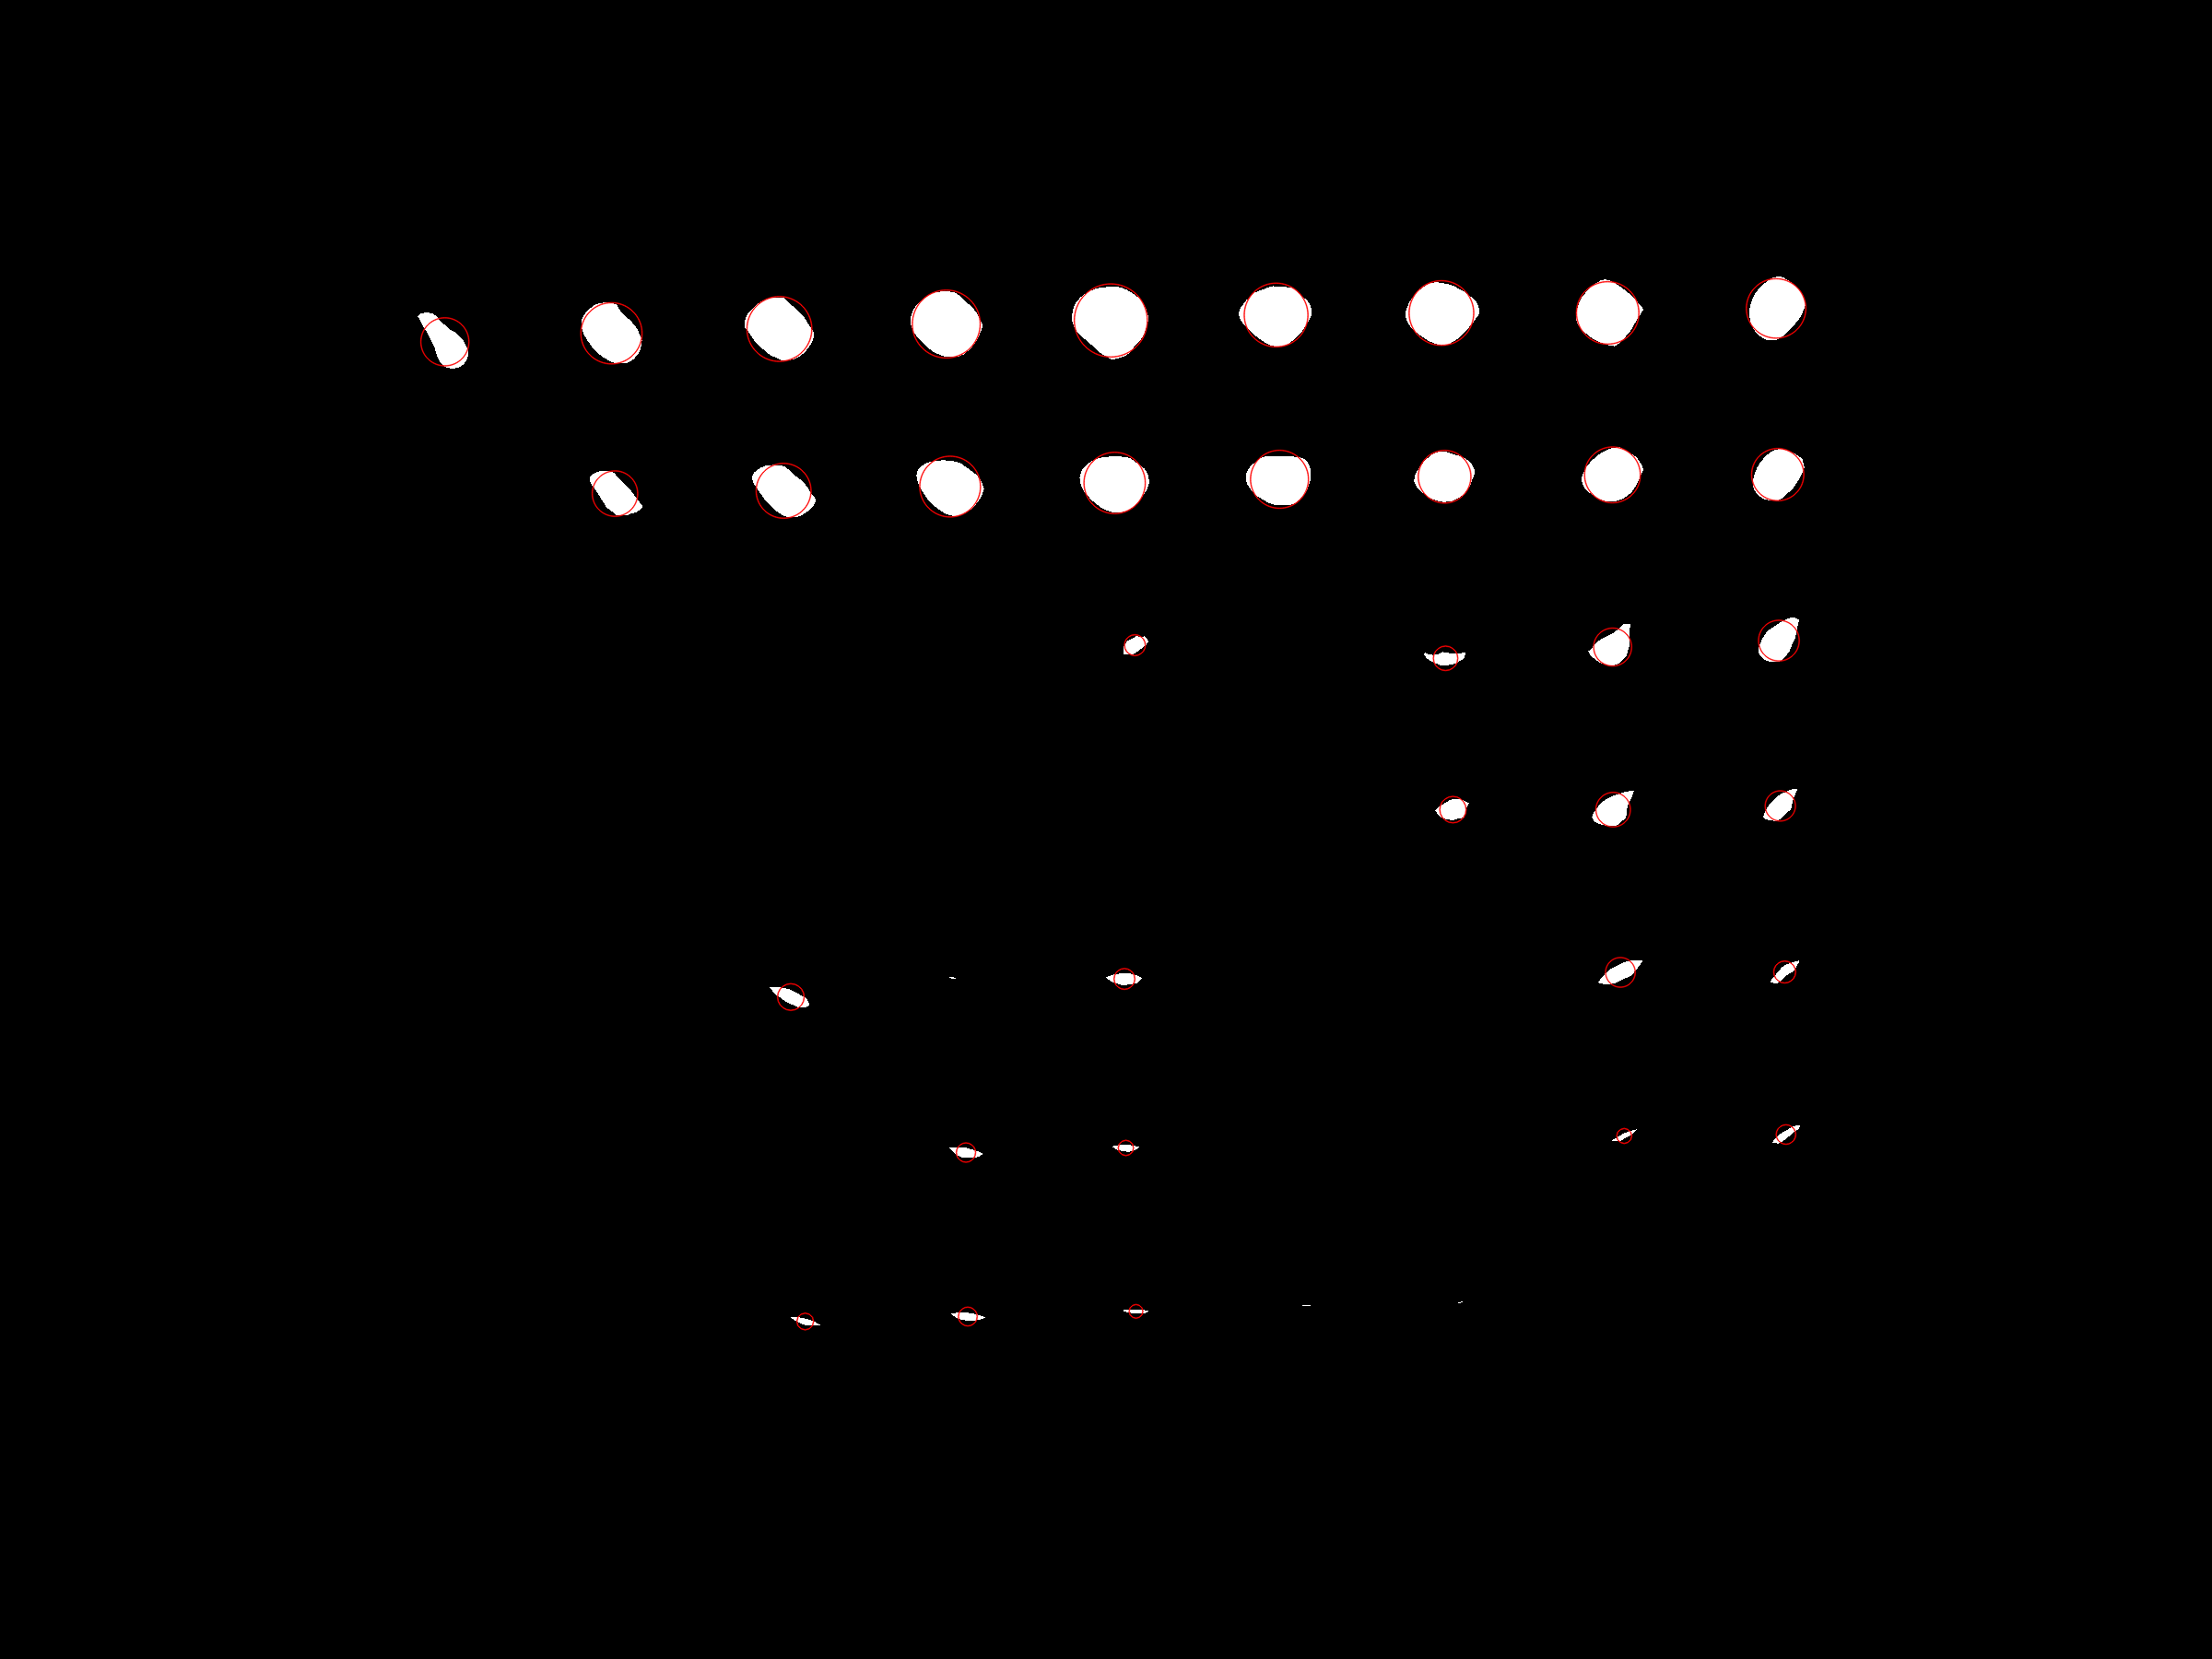

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import skimage.io as io
import skimage.filters as skf
import skimage.morphology as skm
import cv2
from google.colab.patches import cv2_imshow

from google.colab import drive
drive.mount('/content/drive')

!pip install pillow_heif 


# subtask 1: 
# Write a function which retrieves the filenames of the images, 
# contains a loop converting them to png images and saves them.
from PIL import Image
import pillow_heif


url_pre  = '/content/drive/MyDrive/DSF/coding-task-2/'

def heic_images_in_png_images():
  for i in range(5379,5394):
    url_name = 'IMG_' + str(i) + '.HEIC'
    heif_file = pillow_heif.read_heif(url_pre+url_name)
    image = Image.frombytes(heif_file.mode, heif_file.size, bytes(heif_file.data),'raw')
    url_name = url_name.split('.')[0]+'.png'
    image.save(url_pre+url_name, format="png")

# to prevent that conversion loop is executed if png images already exist
for i in range(5379,5394):
  try:
    image = io.imread(url_pre+'IMG_' + str(i) + '.png')
  except:
    heic_images_in_png_images()
    break



# subtask 2:
# With some filtering and sthresholding, write a function which converts the 
# colored bins into nice white segments on a black background for one image.

def filtering_and_thresholding(nr):
  url_name = url_pre + 'IMG_' + str(nr) + '.png'
  imageRGB = io.imread(url_name)
  image = imageRGB[:,:,2]
  cropped_image = image[1900:3700,300:2700]
  image_mean = skf.median(cropped_image,selem=skm.disk(25))
  threshold_manual = 70
  image_threshold = image_mean<threshold_manual
  # convert boolean image back to uint8 image
  img = image_threshold.astype(np.uint8) * 255
  kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (35,45))
  final_image = cv2.erode(img, kernel)
  return final_image




# subtask 3:
# Write an algorithm which counts the number of bins. 

# to be able to see performance of program: compare with manual count
manual_count = {5379:'50-54', 5380:'46-48', 5381:'61-63', 5382:'42-47', 
                5383:'44', 5384:'32', 5385:'51-53', 5386:'50-52', 
                5387:'46-51', 5388:'70-71', 5389:'54-56', 5390:'58-59', 
                5391:'38-43', 5392:'62-64', 5393:'60-62'}


def count_bins(image):
  # set parameters SimpleBlobDetector
  params = cv2.SimpleBlobDetector_Params()
  params.blobColor = 0
  params.filterByColor = True
  params.minArea = 20
  params.maxArea = 20000
  params.filterByArea = True
  params.filterByCircularity = False
  params.filterByInertia = False
  params.filterByConvexity = False
  detector = cv2.SimpleBlobDetector_create(params)
  # count bins
  keypoints = detector.detect(255-image)
  print('Automatic count: ',len(keypoints),'\n')
  im_with_keypoints = cv2.drawKeypoints(image, keypoints, np.array([]), (0,0,255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
  # Show image with labelled blobs
  cv2_imshow(im_with_keypoints)
  cv2.waitKey(0)


# Analyze number of bins in image 5379

print('Manual count :',manual_count[5379])
image = filtering_and_thresholding(5379)
count_bins(image)




# subtask 4:
# do the same as in 3 with all images

for i in range(5379,5394):
  print('Image Number:',i)
  print('Manual count:',manual_count[i])
  image = filtering_and_thresholding(i)
  count_bins(image)



# General problem: doesn't count connected blobs!
# params.minDistBetweenBlobs > 0.01 (0 not allowed)

# final settings: do count some bins as two and others not at all, but result
# in quite accurate values in the end


